In [140]:
import os
import heapq
import argparse
import threading
import multiprocessing
import sys
import queue


from __future__ import division
import math, time
from copy import deepcopy
import multiprocessing, json
from tqdm import tqdm
import heapq
from heapq import nlargest

import matplotlib.pyplot as plt

from networkx.algorithms import community

import bisect


In [141]:
# from google.colab import drive
# drive.mount('/content/drive')

In [142]:
# pip uninstall community

In [143]:
# pip install python-louvain

In [144]:
# pip install networkx

In [145]:
#importing libraries that will be used
import networkx as nx#for creating network
# import community.community_louvain
from networkx.algorithms import structuralholes
import numpy as np
import matplotlib.pyplot as plt#for plotting plots

import random
import time#claculating time
import math
from collections import Counter
from itertools import permutations
from itertools import combinations

from collections import defaultdict
from scipy.io import mmread# to read dataset
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# from cdlib import algorithms

In [146]:
def celf(graph, k):
    # Initialize variables
    nodes = []
    heap = []
    marg_gains = {}

    # Calculate the marginal gain for each node
    for node in graph.nodes():
        # Run Monte Carlo simulations to estimate the influence of each node
        sim_res = IC_new(graph, nodes + [node])
        marg_gains[node] = len(sim_res) - len(nodes)
        # Add the node to the heap with its marginal gain as key
        heapq.heappush(heap, (-marg_gains[node], node))

    # Select the k nodes with the highest influence scores
    while len(nodes) < k:
        # Get the node with the highest marginal gain
        _, node = heapq.heappop(heap)
        # Recalculate the marginal gain of the selected node
        sim_res = IC_new(graph, nodes + [node])
        marg_gains[node] = len(sim_res) - len(nodes)
        # Add the node to the list of selected nodes
        if node not in nodes:
            nodes.append(node)
        # Update the heap with the new marginal gains
        for n in graph.neighbors(node):
            if n not in nodes:
                heapq.heappush(heap, (-marg_gains[n], n))

    return nodes


In [147]:
# import diffusion
from heapdict import heapdict

class Node(object):
    def __init__(self, node):
        self.node = node
        self.mg1 = 0
        self.prev_best = None
        self.mg2 = 0
        self.flag = None
        self.list_index = 0

def CELFPP_linear_Threshold(graph, s):
    seeds=list()
    for e in s:
        seeds.append(e)
    influnces = seeds[:]
    queue = influnces[:]
    pre_node_record = defaultdict(float)
#     print("Queue:",queue)
#     print("Influences:",influnces)
    while len(queue) != 0:
        node = queue.pop(0)
#         print("----------------------------------------------------------------------")
#         print("Take node:",node)
#         print("Neighbour:",graph[node])
        for element in graph[node]:
            if element not in influnces:
#                 print("Element:",element,"prerecored",pre_node_record[element])
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight']
#                 print(pre_node_record[element])
                if pre_node_record[element] >= graph.nodes[element]['thres']:
#                     print(">>>>>>>>>>>>>>>>>>node influeced:",element)
                    influnces.append(element)
                    queue.append(element)
#     influnce_num = len(influnces)
#     print("Seed set:",seeds,"Activated nodes:",influnces)
    return len(influnces)

def celfpp(G, k):
    S = set()
    # Note that heapdict is min heap and hence add negative priorities for
    # it to work.
    Q = heapdict()
    last_seed = None
    cur_best = None
    node_data_list = []

    for node in G.nodes:
        node_data = Node(node)
        node_data.mg1 = CELFPP_linear_Threshold(G,[node])
        node_data.prev_best = cur_best
        node_data.mg2 = CELFPP_linear_Threshold(G,[node, cur_best.node]) if cur_best else node_data.mg1
        node_data.flag = 0
        cur_best = cur_best if cur_best and cur_best.mg1 > node_data.mg1 else node_data
        G.nodes[node]['node_data'] = node_data
        node_data_list.append(node_data)
        node_data.list_index = len(node_data_list) - 1
        Q[int(node_data.list_index)] = - node_data.mg1

    while len(S) < k:
        node_idx, _ = Q.peekitem()
        node_data = node_data_list[node_idx]
        if node_data.flag == len(S):
            S.add(node_data.node)
            del Q[node_idx]
            last_seed = node_data
            continue
        elif node_data.prev_best == last_seed:
            node_data.mg1 = node_data.mg2
        else:
            before = CELFPP_linear_Threshold(G,S)
            S.add(node_data.node)
            after = CELFPP_linear_Threshold(G,S)
            S.remove(node_data.node)
            node_data.mg1 = after - before
            node_data.prev_best = cur_best
            S.add(cur_best.node)
            before = CELFPP_linear_Threshold(G,S)
            S.add(node_data.node)
            after = CELFPP_linear_Threshold(G,S)
            S.remove(cur_best.node)
            if node_data.node != cur_best.node: S.remove(node_data.node)
            node_data.mg2 = after - before

        if cur_best and cur_best.mg1 < node_data.mg1:
            cur_best = node_data

        node_data.flag = len(S)
        Q[node_idx] = - node_data.mg1
    SS=list(S)
#     print("final seed set:",SS)
    return SS

In [148]:
def Greedy(G,k):
    print("in Greedy")
    Dict={}
    mySet1=[]
    V=G.nodes()
    mySet1.clear()
    for i in range(k):
        for v in (V-mySet1):
            mySet1.append(v)
            a=linear_Threshold(G,mySet1)
            Dict[v]=len(a)#influence as value and current node as key
            mySet1.remove(v)#remove crrent node from mySet for rest nodes to go for IC
        Keymax = max(zip(Dict.values(), Dict.keys()))[1]# finding node with max influence
        Dict.clear()
        mySet1.append(Keymax)
#     print("Final seed set is:",mySet1,compute_Phi(G,mySet1,comm,k))
    return list(mySet1)


In [149]:
# ratiolevel0bridge=25
# executeDiv()
# processResults()

In [150]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


"""
Model Parameters :
    GRAPH :
        directed
        node :
            node_id
            label
            probability
        edge :
            source
            target

    n -> population size
    k -> seed set size
    flight_length -> flight lengths of crows
    epoch -> max number of iterations
    awareness_probability-> awareness probability
    alpha -> constant to calculate node_contribution_index. used for optimisation using random walk
    beta ->  constant to select candidates for random walk
"""


# In[3]:


import random
import itertools


# In[4]:



#build graph from data
# G = nx.read_gml("test1.gml", label = 'id')

#visualizing the graph
# print(G.nodes(data=True))
# print(G.edges(data=True))

# Define node positions (optional)
# pos = nx.spring_layout(G)
# Get node labels
# node_labels = {node: data['label'] for node, data in G.nodes(data=True)}
# Draw the graph
# nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')


# In[ ]:


# print(G.out_degree())


# In[5]:


#replace for diversity in crow nodes
def replace(j,seed,left):
#     print("In replace:",j,seed,left)
    index = random.randint(0,len(left) - 1)
    seed[j], left[index] = left[index], seed[j]
#     print("seed[j]",seed[j])
    return seed[j]


# returns a list of crow positions
def initialize_population(G, n, k) :
    nodes_degree = list(G.out_degree())
    nodes_degree = [x[0] for x in sorted(nodes_degree, key=lambda x: x[1])]
#     print("nodes_degree:",nodes_degree)
    population = []
    for i in range(n) :
        seed, left = nodes_degree[:k], nodes_degree[k:]
#         print(seed,left)
        for j in range(k):
            if(random.random() > 0.9):                                                          # REPLACEMENT PARAMETER = 0.5
                seed[j] = replace(j,seed,left)
        population.append(seed)
    return population


# In[ ]:


# initialize_population(G, 1, 5)


# In[6]:


#initialize a vector r_val[n] where 0<r[i]<1
def initialize_random(n):
#     r_val=dict()
#     for node in G.nodes():
#         print(node)
#         r_val[node]=random.random()
    r_val = [random.random() for i in range(n)]
    return r_val


# In[ ]:


# initialize_random(3)


# In[7]:


# def local_influence_estimate(G : nx.classes.digraph.DiGraph, seed : list) :
#     k = len(seed)
#     seed_set = set(seed)


#     one_neighbours = set()
#     for node_id in seed_set :
#         one_neighbours.update(set(G.neighbors(node_id)))
#     one_neighbours = one_neighbours - seed_set


#     two_neighbours = set()
#     for node_id1 in one_neighbours :
#         two_neighbours.update(set(G.neighbors(node_id1)))
#     two_neighbours = two_neighbours - seed_set

#     one_hop_area = len(one_neighbours)
#     if one_hop_area == 0:
#         return k
#     two_hop_area = len(two_neighbours)

#     sigma_0 = k
#     sigma_1 = 0
#     for node_id1 in one_neighbours:
#         val = 1
#         for node_id in seed_set:
# #             print("edge:", node_id,"->",node_id1)
#             if(G.has_edge(node_id,node_id1)) :
# #                 print("Yes edge is present:", node_id,"->",node_id1)
# #                 p = G.nodes[node_id]['probability']

# #                 for u, v, data in G.edges(data=True):
# #                     weight = data['weight']
# #                     print(f"Edge {u}-{v} has weight {weight}")

#                 p = G[node_id][node_id1]['weight']
#                 val = val * ( 1 - p)
#         sigma_1 += (1 - val)

#     factor = 0


#     for node_id2 in two_neighbours:
#         p = G.nodes[node_id2]['probability']
#         d = 0
#         for node_id1 in one_neighbours:
#             if(G.has_edge(node_id2, node_id1)):
#                 d += 1
#         factor += p*d

#     factor /= one_hop_area
#     factor += 1

#     LIE = sigma_0 + factor * sigma_1
#     return LIE





def local_influence_estimate(graph, seeds):
    influnces = seeds[:]
    queue = influnces[:]
    pre_node_record = defaultdict(float)
#     print("Queue:",queue)
#     print("Influences:",influnces)
    while len(queue) != 0:
        node = queue.pop(0)
#         print("----------------------------------------------------------------------")
#         print("Take node:",node)
#         print("Neighbour:",graph[node])
        for element in graph[node]:
            if element not in influnces:
#                 print("Element:",element,"prerecored",pre_node_record[element])
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight']
#                 print(pre_node_record[element])
                if pre_node_record[element] >= graph.nodes[element]['thres']:
#                     print(">>>>>>>>>>>>>>>>>>node influeced:",element)
                    influnces.append(element)
                    queue.append(element)
#     influnce_num = len(influnces)
#     print("Seed set:",seeds,"Activated nodes:",influnces)
    return len(influnces)

# In[ ]:


# local_influence_estimate(G, [1,20,30,5,16])


# In[8]:


def get_updated_seed(G,seed, r, flight_length, memory):
#     print("\nin update seed----",seed)
    k = len(seed)

    intersection = set(seed).intersection(set(memory))

#     print("intersection:",intersection)
    seed_intersection_memory = [0 if node_id in intersection else 1 for node_id in seed]
#     print("seed_intersection_memory:",seed_intersection_memory)
#     print("r:",r)
    H_arg = [r * flight_length * sim for sim in seed_intersection_memory]
#     print("Harg:",H_arg)
    H_val = [0 if H_arg_j < 1 else 1 for H_arg_j in H_arg]
#     print("Hval_:",H_val)
    left = list(set(G.nodes()) - set(seed))
#     print("left:",left)

    seed = [seed[j] if H_val[j] == 0 else replace(j,seed,left) for j in range(k)]
#     print("seed after updation:",seed)
    return seed;


# In[ ]:


#TEST
# get_updated_seed([1,20,30,5,16], 3, 2, [29,15,32,2,20] )


# In[9]:


def get_seed_random_walk(candidates : list, k : int):
    assert len(candidates) >= k, "b>1 must be"
    temp = [x for x in  candidates]
    seed = []
#     print("Candidate set:",candidates)
    while len(seed) < k :
        node_id = random.choice(temp)
        seed.append(node_id)
        temp.remove(node_id)
#     print("seed set:",seed)
    return seed


# In[ ]:


# TEST
# get_seed_random_walk([5,6,7,2,15,16,54,62,51,1],3)


# In[10]:


def get_best_seed(G, population : list) :
    best_seed = population[0]
    best_lie = local_influence_estimate(G, best_seed)
    for seed in population:
#         print("Seed:",seed,"-->",local_influence_estimate(G, seed))
        current_lie=local_influence_estimate(G, seed)
        if(current_lie > best_lie) :
            best_seed = seed
            best_lie=current_lie

#     print("best seed:",best_seed,"-->",local_influence_estimate(G,best_seed))
    return best_seed


# In[ ]:


# get_best_seed(G, [[22,13,16], [1,20,13]])


# In[11]:


import math
def generate_candidates_for_random_walk(G : nx.classes.digraph.DiGraph, alpha : float , beta : float, k : int) :
    #get k-shell values of all nodes
    G.remove_edges_from(nx.selfloop_edges(G))
    k_shell = nx.core_number(G)
    #get structural hole values of all nodes
#     Deg=G.degree()
#     structural_hole = nx.effective_size(G)
    structural_hole = nx.betweenness_centrality(G)
#     structural_hole = structuralholes.constraint(G)
#     for node in G.nodes():
#         print("node:",node,Deg[node],structural_hole[node], k_shell[node])
    for node_id, sh_val in structural_hole.items():                                                     #ALTERATION
        if  math.isnan(sh_val) or sh_val == 0:
            structural_hole[node_id] = 1

    #calculating node_contribution_index
    contribution_index =  {}
    k_shell_sum = sum(k_shell)

    structural_hole_inv_sum = 0
    for sh_val in structural_hole.values() :
#         print("structuhole:",sh_val,1 / sh_val)
        structural_hole_inv_sum += 1 / sh_val


#     print("k_shell:",k_shell_sum)
#     print("structure sum:",structural_hole_inv_sum)

    for node_id in G.nodes():
        contri_val = (alpha * k_shell[node_id] / k_shell_sum)
        contri_val += ((1 - alpha) * ((1 / structural_hole[node_id]) )/ structural_hole_inv_sum)
#         print("node:",node_id,"->First->",(alpha * k_shell[node_id] / k_shell_sum), "second->",((1 - alpha) * ((1 / structural_hole[node_id]) )/ structural_hole_inv_sum),"final:",contri_val)
        contribution_index[node_id] = contri_val
#         print(contribution_index[node_id])
#     for node in G.nodes():
#         print("node:",node," Deg-->",Deg[node]," ST-->", structural_hole[node]," K_shell-->", k_shell[node]," Cont-->",contribution_index[node_id])
#         print("node:",node,"Deg:",Deg[node]," Cont-->",contribution_index[node])

    #generating candidates
    candidates_count = beta * k
    contribution_index = dict(sorted(contribution_index.items(),key=lambda x:x[1],reverse=True))

#     print("Sorted:",contribution_index)

    candidates = list(contribution_index.keys())
    candidates = candidates[:candidates_count]

#     print("Candidate:",candidates)
    return candidates


# In[]:


#TESTING
# generate_candidates_for_random_walk(G, 0.5, 2, 3)


# In[12]:


def local_search(G : nx.classes.digraph.DiGraph, best_seed : list) :
#     print("best seed ",best_seed)
    k = len(best_seed)
    degree = {}
    for node_id in best_seed:
        degree[node_id] = G.degree(node_id)

    degree = dict(sorted(degree.items(), key=lambda x : x[1]))
    best_seed = list(degree.keys())
#     print("best seed ",best_seed)
    for j in range(k):
#         print("For seed j:",best_seed[j])
        neighbours = list(set(G.neighbors(best_seed[j]))  - set(best_seed))

        new_best_seed = best_seed
        new_best_lie = local_influence_estimate(G, new_best_seed)
#         print("best seed ",new_best_seed," lie-->",new_best_lie)
# #         print("Neighbour:",neighbours)
        for node_id_index in range(len(neighbours)):
#             print("new_best_seed[j], neighbours[node_id_index]:",new_best_seed[j], neighbours[node_id_index])
            new_best_seed[j], neighbours[node_id_index] = neighbours[node_id_index], new_best_seed[j]
#             print("new_best_seed[j], neighbours[node_id_index]:",new_best_seed[j], neighbours[node_id_index])
#             print("new best seed ",new_best_seed,"-->",local_influence_estimate(G,new_best_seed))
            if(local_influence_estimate(G, new_best_seed) > new_best_lie) :
                new_best_lie = local_influence_estimate(G,new_best_seed)
#                 print("yes:seed is-->",new_best_seed)

            else :
#                 print("no")
                new_best_seed[j], neighbours[node_id_index] = neighbours[node_id_index], new_best_seed[j]

        best_seed = new_best_seed
#         print("End Best seed set:",best_seed)

    return best_seed


# In[ ]:


# local_search(G, [28,30,33])


# In[13]:



def DCSA(G : nx.classes.digraph.DiGraph, n : int, k : int, epoch : int, flight_length : int , awareness_probability : int ,alpha : float, beta : float):
    """
    Implementation of CROW algorithm for influence maximization in social networks

    Args:
    - G: NetworkX directed graph object representing the social network
    - n: crow population size
    - k: number of nodes to select
    - epoch: maximum number of iterations
    - flight_length: length of flight of crows
    - awareness_probability: if crow j is aware of i following him

    Returns:
    - nodes: list of k nodes with the highest influence scores
    """

    # Initialize variables
    V = len(G.nodes())      #total number of nodes

    population = initialize_population(G,n,k)         # == x
#     print(population)

    memory = initialize_population(G,n,k)     # == m
#     print(memory)

    r_val = initialize_random(n)        # == r
#     print("r_val:",len(r_val))

    best_seed = get_best_seed(G, population)
#     print("best_seed:",best_seed)

    candidates_for_random_walk = generate_candidates_for_random_walk(G, alpha, beta, k)
#     print("candidates_for_random_walk:",candidates_for_random_walk)

    for _ in range(epoch) :
        for i in range(n):
            f = i
            while(i == f) :
                f = random.randint(0,n-1)
            # crow i follows crow f
            if r_val[f] > awareness_probability :
                population[i] = get_updated_seed(G,population[i], r_val[i], flight_length, memory[f])
            else :
                new_seed = get_seed_random_walk(candidates_for_random_walk, k)
#                 print("size:",len(new_seed),k)
#                 print("New seed:",new_seed," -->",local_influence_estimate(G, new_seed),local_influence_estimate(G, population[i]))
                if (local_influence_estimate(G, new_seed) > local_influence_estimate(G, population[i])) :
                    population[i] = new_seed

        # update memory of crows
        for i in range(n):
            if local_influence_estimate(G, population[i]) > local_influence_estimate(G, memory[i]) :
                memory[i] = population[i]

        #update best seed
#         for i in range(n):
#             print(population[i],"-->",local_influence_estimate(G, population[i]))

        best_seed = get_best_seed(G, population)
#         print("best seed:",best_seed,"-->",local_influence_estimate(G,best_seed))


        #update best seed by local search
        new_best_seed = local_search(G, best_seed)
        if(local_influence_estimate(G, new_best_seed) > local_influence_estimate(G, best_seed)) :
            best_seed = new_best_seed

    return best_seed, local_influence_estimate(G, best_seed)


# In[14]:


def DCSA_run(G,k):
    n = 30
    epoch = 100
    flight_length = 2.5
    awareness_probability = 0.1
    alpha = 0.5
    beta = 2
    seed_set,Inf = DCSA(
        G=G,
        n=n,
        k=k,
        epoch=epoch,
        flight_length=flight_length,
        awareness_probability=awareness_probability,
        alpha= alpha,
        beta = beta
        )
    print("sseed set:",seed_set,Inf)
    return seed_set


# DCSA_run(G,k)


# iteration=1
# # # ratiolevel0bridge=0
# Result_file_name="Power_EW_Bridge_BridgeRatio0_1.xlsx"
# executeDiv(iteration)
# processResults(Result_file_name)






In [151]:
# -- coding: utf-8 --
# @Time : 2022/5/14 16:00
# @Author : Mkc
# @Email : mkc17@foxmail.com
# @Software: PyCharm

import numpy as np
import networkx as nx
import time
import random
import math
import copy
from time import strftime, localtime

def IC_model(graph,seeds,mc,p=0.01):
    g=graph
    S=seeds
    spread = []
    for i in range(mc):
        new_active, Au = S[:], S[:]
        while new_active:
            new_ones = []
            for node in new_active:
                nbs = list(set(g.neighbors(node)) - set(Au))
                for nb in nbs:
                    if random.random() <= p:
                        new_ones.append(nb)
            new_active = list(set(new_ones))
            Au += new_active
        spread.append(len(Au))
    return np.mean(spread)


#     influnces = seeds[:]
#     queue = influnces[:]
#     pre_node_record = defaultdict(float)
# #     print("Queue:",queue)
# #     print("Influences:",influnces)
#     while len(queue) != 0:
#         node = queue.pop(0)
# #         print("----------------------------------------------------------------------")
# #         print("Take node:",node)
# #         print("Neighbour:",graph[node])
#         for element in graph[node]:
#             if element not in influnces:
# #                 print("Element:",element,"prerecored",pre_node_record[element])
#                 pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight']
# #                 print(pre_node_record[element])
#                 if pre_node_record[element] >= graph.nodes[element]['thres']:
# #                     print(">>>>>>>>>>>>>>>>>>node influeced:",element)
#                     influnces.append(element)
#                     queue.append(element)
# #     influnce_num = len(influnces)
# #     print("Seed set:",seeds,"Activated nodes:",influnces)
#     return len(influnces)
# # linear_Threshold(GG,[45,29])

#EDV
def Eval(G, S):
    Neighbors = Neighbor_Nodeset(G, S)

    fitness = len(S)
    L = list(set(Neighbors) - set(S))
    for TIME in L:
        fitness += 1 - (1 - 0.01) ** len(set(G.neighbors(TIME)) & set(S))
    return fitness

def Neighbor_nodes(G,u):
    return list(G.neighbors(u)) + [u]

def Neighbor_Nodeset(G,S):
    neighbors = [ ]
    for i in S:
        neighbors += Neighbor_nodes(G,i)
    neighbors = list(set(neighbors))
    return neighbors

def pop_init(nodes,pop,K,t,avg_d):
    P = []

    for i in range(pop):
        P_Item = []
        for Kt in range(K):
            temp = math.ceil((Kt+1) * math.exp(t * avg_d))+Kt+1
            if temp>len(nodes):
                temp = len(nodes)

            P_Item.append(nodes[random.randint(0,temp-1)])
        P.append(P_Item)

    return P

def mutation(G,P,P_remain,mu,K,t,avg_d,nodes):
    P_new = copy.deepcopy(P)

    for P_It in P_new:
        if P_new.index(P_It) == 0:
            temp = math.ceil(K * math.exp(t * avg_d))+K
            if temp <= K:
                temp += 1
            if temp>len(nodes):
                temp = len(nodes)

            ran_int = random.randint(0,K-1)

            while True:
                ran_temp = random.randint(0,temp-1)
                if nodes[ran_temp] not in P_It:
                    P_It[ran_int] = nodes[ran_temp]
                    break
            continue

        if P_new.index(P_It) < len(P_new)/2:
            temp = math.ceil(K * math.exp(t * avg_d))+K
        else:
            temp = math.ceil((K-1) * math.exp(t * avg_d))+K-1

        if temp <= K:
            temp += 1
        if temp > len(nodes):
            temp = len(nodes)

        # candidate nodes
        node_set = []
        # probability of candidate nodes being selected
        degree_pro = []

        for i in range(temp):
            node_set.append(nodes[i])
            degree_pro.append(G.degree(nodes[i]))

        degree_sum = sum(degree_pro)
        for deg in range(len(degree_pro)):
            degree_pro[deg] = degree_pro[deg] / degree_sum
        degree_pro = np.array(degree_pro)

        for index in range(len(P_It)):
            if P_It[index] not in P_remain[P_new.index(P_It)]:
                if random.random() < mu:
                    while True:
                        temp_d = np.random.choice(node_set, size=1, p=degree_pro.ravel())

                        if temp_d[0] not in P_It:
                            P_It[index] = temp_d[0]
                            break
    return P_new

def crossover(P,cr,pop):
    P_c = []
    P_remain = []

    random_int = 0
    P_c.append(P[random_int])

    P_remain.append([])
    for pop_index in range(pop):
        if pop_index == random_int:
            continue

        ind = list(set(P[random_int]) & set(P[pop_index]))
        P_remain.append(ind)
        P_1 = copy.deepcopy(P)
        P_1[random_int] = list(set(P_1[random_int]) - set(ind))
        P_1[pop_index] = list(set(P_1[pop_index]) - set(ind))

        for kk in range(len(P_1[random_int])):
            if random.random() < cr:
                ind.append(P_1[random_int][kk])
            else:
                ind.append(P_1[pop_index][kk])
        P_c.append(ind)
    return P_c,P_remain


def main(G,k):
#     for address in ["dolphins_edge_list.txt"]:
#         print(address)
    for K in [k]:
        result1 = []#influence spread
        result2 = []#running time
        for A in range(2):
#             print(strftime("%Y-%m-%d %H:%M:%S", localtime()))
#                 G = nx.read_edgelist(address, create_using=nx.Graph())
            start_time = time.perf_counter()

            nodes = list(G.nodes)
            edges = list(G.edges)
            nodes = sorted(nodes, key=lambda x: G.degree(x), reverse=True)

            pop = 10
            t = 0.04
            avg_d = round(2*len(edges)/len(nodes),2)
            mu = 0.1
            cr = 0.6
            maxgen = 15

            #initialization
            P = pop_init(nodes,pop,1,t,avg_d)

            for KK in range(2,K+1):
                i = 0
                #seed addition
                temp = math.ceil(KK * math.exp(t * avg_d)) + KK
                if temp>len(nodes):
                    temp = len(nodes)

                for ind in range(len(P)):
                    while True:
                        ran_index = random.randint(0,temp-1)
                        if nodes[ran_index] not in P[ind]:
                            P[ind].append(nodes[ran_index])
                            break

                while i < maxgen:
                    P = sorted(P,key=lambda x:Eval(G,x),reverse=True)

                    # mutation&crossover
                    P_cross, P_remain = crossover(P, cr, pop)
                    P_mutation = mutation(G,P_cross, P_remain, mu, KK, t, avg_d, nodes)

                    #selection
                    for index in range(pop):
                        Inf1 = Eval(G, P_mutation[index])
                        Inf2 = Eval(G, P[index])
                        if Inf1 > Inf2:
                            P[index] = P_mutation[index]
                    i += 1

            solution = sorted(P,key=lambda x:Eval(G,x),reverse=True)[0]

            end_time = time.perf_counter()
            runningtime = end_time-start_time

            result1.append(IC_model(G, solution, 10000))
            result2.append(runningtime)

#         print(result1)
#         print(result2)
#         print( "K:", K, "Influence spread:", round(np.mean(result1), 1),"Running time:",round(np.mean(result2),1))
#         print("seed set:",solution)
    return solution


# if __name__ == '__main__':
#     main()

def runSSR(G,k):
    seedset=main(G,k)
#     print("end:",seedset)
    return seedset




In [152]:
def modify_graph(graph):
    """
        Removes nodes and edges with degree 1
    """

    to_remove = []
    for node in graph.nodes():
        if graph.degree(node) == 1:
            to_remove.append(node)
    
    for node in to_remove:
        graph.remove_node(node)
        
    return graph





def random_position_function(graph):
    listt_X = []
    maxx_degree = 0
#     print("Graph:",graph)
    for node in graph.nodes():
        currentt_degree = graph.degree(node)
        maxx_degree = max(maxx_degree, currentt_degree)

        # Chance of a node being selected is proportional to its degree
#         print("current degeee:",currentt_degree)
        aa=random.randint(1, currentt_degree)
        listt_X.append(aa)
    
    XX = np.array(listt_X)
    

    # Normalizing the chance of each node
    XX = XX / maxx_degree
    return XX

def get_seed_set(graph, X, k):
    # This list will store the pair (probabilty of activation, node no.)
    max_list = []

    # All nodes in the graph
    list_of_nodes = list(graph.nodes)

    for i in range(len(list_of_nodes)):
        max_list.append((X[i], list_of_nodes[i]))

    max_list.sort(reverse=True)

    seed_set = [x for _, x in max_list]

    # returning k nodes with the highest probability of activation
    return seed_set[:k]

def fitness_func(graph, X, k):
    """
    Args:
        graph - Weighted graph where weights are
        the activation probabilty (Cascading Model)

        X - Position of the wolf. It is an array that represents the
        chance of the current node to be selected in the seed set

        k - The desired size of the seed set
    """

    dim = len(graph.nodes())

    seed_set = get_seed_set(graph, X, k)
    seed_set = set(seed_set)

    probability_first = dict()
    first_order_neighbour = set()

    probability_second = dict()
    second_order_neighbour = set()

    # Running BFS for a single iteration to get first order neighbours
    for node in seed_set:
        for neighbour in graph[node]:
            if neighbour not in seed_set:
                if neighbour in probability_first:
                    probability_first[neighbour] += graph[node][neighbour]['weight']
                else:
                    probability_first[neighbour] = graph[node][neighbour]['weight']
                
                first_order_neighbour.add(neighbour)

    # Running BFS for a single iteration to get second order neighbours
    for node in first_order_neighbour:
        for neighbour in graph[node]:
            if neighbour not in seed_set:
                if neighbour in probability_second:
                    probability_second[neighbour] += graph[node][neighbour]['weight'] * probability_first[node]
                else:
                    probability_second[neighbour] = graph[node][neighbour]['weight'] * probability_first[node]
                
                second_order_neighbour.add(neighbour)
    
    activation_probability = dict()

    # Adding contribution of first order neighbours
    activation_probability = probability_first.copy()

    # Adding contribution of second order neighbours
    for node in second_order_neighbour:
        if node in activation_probability:
            activation_probability[node] += probability_second[node]
        else:
            activation_probability[node] = probability_second[node]

    worthiness = dict()
    for node in activation_probability.keys():
        worthiness[node] = activation_probability[node] * graph.degree(node)

    # Total worthiness is sum of all worthiness
    W = sum(worthiness.values())

    fitness = 0

    # Calculating fitness using formula
    for w in worthiness.values():
        nw = w / W
        fitness += -(nw * math.log(nw))   # math.log(x) -> ln(x)
    
    return fitness


def GWIM(graph, k=10, pop=50, epoch=100):
    """
    Args:
        graph - Weighted graph where weights are the activation probabilty (Cascading Model)
        k - number of population size, default = 10
        epoch - maximum number of iterations, default = 100
    """

    # number of nodes in the graph
    dim = len(graph.nodes())

    # Population of wolves or the possible solutions
    wolves = []

    # Used to find alpha, beta & delta wolves
    max_list = []

    # Generating the population
    for i in range(pop):
        current_wolf = random_position_function(graph)
        current_fitness = fitness_func(graph, current_wolf, k)

        max_list.append((current_fitness, i))
        wolves.append(current_wolf)

    wolves = np.array(wolves)
    max_list.sort(reverse=True)

    # For finding aplha, beta, delta wolves
    alpha_index = max_list[0][1]
    beta_index = max_list[1][1]
    delta_index = max_list[2][1]
    
    alpha_fitness = max_list[0][0]
    beta_fitness = max_list[1][0]
    delta_fitness = max_list[2][0]

    alpha_wolf = wolves[alpha_index].copy()
    beta_wolf = wolves[beta_index].copy()
    delta_wolf = wolves[delta_index].copy()

    # Running the epochs
    for t in range(epoch):
        a = 2 - 2 * (t + 1) / epoch

        # Applying updation formula
        for i in range(pop):
            A1 = a * (2 * np.random.rand(dim) - 1)
            A2 = a * (2 * np.random.rand(dim) - 1)
            A3 = a * (2 * np.random.rand(dim) - 1)

            C1 = 2 * np.random.rand(dim)
            C2 = 2 * np.random.rand(dim)
            C3 = 2 * np.random.rand(dim)

            Y1 = alpha_wolf - A1 * np.abs(C1 * alpha_wolf - wolves[i])
            Y2 = beta_wolf - A2 * np.abs(C2 * beta_wolf - wolves[i])
            Y3 = delta_wolf - A3 * np.abs(C3 * delta_wolf - wolves[i])

            X = (Y1 + Y2 + Y3) / 3.0
            wolves[i] = X

            current_fitness = fitness_func(graph, X, k)

            # Updating positions of the wolves
            if current_fitness > alpha_fitness:
                alpha_fitness = current_fitness
                alpha_wolf = X.copy()
            elif current_fitness > beta_fitness:
                beta_fitness = current_fitness
                beta_wolf = X.copy()
            elif current_fitness > delta_fitness:
                delta_fitness = current_fitness
                delta_wolf = X.copy()

        # print(alpha_fitness)
    
    return get_seed_set(graph, alpha_wolf, k)


def runGWIM(G,k):
#     graph = modify_graph(G)
    seedSet=GWIM(G,k)
    return seedSet


In [153]:

# Sort node names based on your desired range
def preprocess(G):
    current_names = list(sorted(G.nodes()))

    # Sort node names based on your desired range
    num_nodes = len(current_names)
    sorted_names = list(range(0, num_nodes))

    # Create a mapping from current names to sorted names
    mapping = {current_names[i]: sorted_names[i] for i in range(num_nodes)}

    # Rename nodes
    nx.relabel_nodes(G, mapping, copy=False)
    return G


# Now your graph nodes are renamed from 1 to the number of nodes
# You can print the nodes to verify
# print(sorted(G.nodes()))
# weighted_degrees = dict(nx.degree(G))


# In[6]:


def GetCommunities(file_path):
    b = {}
    list_of_lists = []
    file_path=comm_file_path
    # Open the file in read mode
    with open(file_path, 'r') as file:
        # Iterate through each line in the file
        # a = 0
        for line in file:
            # Strip the newline character from the end of the line and split by spaces
            elements = line.strip().split()
            b[int(elements[0])] = int(elements[1])
            # for i in range(len(elements)):
            #     b[int(elements[i])] = a
            # a+=1
    return b


def sort_nodes(nodes, centrality):
    """
    Sorts the Nodes in the given list of nodes based on the corresponding Centrality Measure of each node
    Parameters:
        nodes = List of nodes which has to be sorted
        centrality = List of Centrality Measures corresponding to each node in the list
    Returns:
        List of nodes sorted on the basis of their Centrality Measure in descending order
    """
    result = sorted(list(zip(centrality, nodes)), reverse = True)
    result = zip(*result)
    result = [list(tuple) for tuple in result]
    return result[1]

def sort_degree_centrality(G,nodes):
    """
    Calculates the Degree Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.degree_centrality(G)
    return sort_nodes(nodes,centrality)

def sort_eigenvector_centrality(G,nodes):
    """
    Calculates the Eigenvector Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.degree_centrality(G)
    cen_measure = []
    for i in nodes:
        cen_measure.append(centrality[i])
    return sort_nodes(nodes, cen_measure)

def sort_betweenness_centrality(G,nodes):
    """
    Calculates the Betweenness Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.betweenness_centrality(G)
    return centrality

def sort_closeness_centrality(G,nodes):
    """
    Calculates the Closeness Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.closeness_centrality(G)
    return centrality

def sort_katz_centrality(G,nodes):
    """
    Calculates the Katz Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.degree_centrality(G)
    cen_measure = []
    for i in nodes:
        cen_measure.append(centrality[i])
    return sort_nodes(nodes, cen_measure)

def sort_percolation_centrality(G,nodes):
    """
    Calculates the Percolation Centrality of each Node in the given list of nodes and returns a descendingly sorted list of nodes
    Parameters:
        nodes = List of nodes to be sorted on the basis of the Centrality Measure
    Returns:
        List of Nodes sorted in descending order on the basis of the Centrality Measure
    """
    centrality = nx.degree_centrality(G)
    cen_measure = []
    for i in nodes:
        cen_measure.append(centrality[i])
    return sort_nodes(nodes, cen_measure)


# In[7]:


def one_hop_area(G,meme):

    temp = [] # Temporary list to store the One-Hop Area nodes of the meme
    for i in meme:
        temp.extend(list(G.neighbors(i)))
    return list(set(temp) - set(meme)) # Returning only unique nodes, to avoid Node Repetition

def two_hop_area(G,meme):

    one_hop = one_hop_area(G,meme)
    temp = [] # Temporary list to store the Two-Hop Area nodes of the meme
    for i in one_hop:
        temp.extend(list(G.neighbors(i)))
    return list(set(temp) - set(meme) - set(one_hop)) # Returning only unique nodes, to avoid Node Repetition

def calc_pcm_prob(G,nodes,weighted_degrees):
    prob = [] # Temporary List to store the corresponding Cascade Probability of the Nodes
    for i in nodes:
        prob.append(weighted_degrees[i] / G.number_of_nodes())
    return prob

def calc_edges(G,group1, group2):
    count = [] # Temporary storage to store the Number of edges corresponding each node
    for i in group2:
        edges = list(nx.edges(G, nbunch = [i]))
        temp = 0
        for i in edges:
            if (i[1] in group1) or (i[1] in group2):
                temp += 1
        count.append(temp)
    return count

def sum_pd(list1, list2):
    p = 0 # Temporary variable to store the Sum-Product of the two lists
    for i in range(len(list1)):
        p += (list1[i] * list2[i])
    return p

def common_neighbors_directed(graph, u, v):
    # Ensure the graph is directed
    if not graph.is_directed():
        raise ValueError("The graph must be directed.")
    
    # Predecessors of u and v
    pred_u = set(graph.predecessors(u))
    pred_v = set(graph.predecessors(v))
    
    # Successors of u and v
    succ_u = set(graph.successors(u))
    succ_v = set(graph.successors(v))
    
    # Common neighbors are those nodes that are both successors and predecessors of u and v
    common_neighbors = (pred_u & pred_v) | (succ_u & succ_v)
    
    return common_neighbors

def calc_edge_prob(G,meme, one_hop):
    N = G.number_of_nodes() # Total Nodes in the Graph
    prob_sum = 0
    for i in one_hop:
        prob_prod = 1
        for j in meme:
            pij = 0.01
            pij += ((G.degree(i) + G.degree(j)) / N)
            pij += (len(list(common_neighbors_directed(G, i, j))) / N)
            prob_prod *= (1 - pij)
        prob_sum += (1 - prob_prod)
    return prob_sum

def LIE(G,meme,weighted_degrees):
    k=len(meme)
    Ns1_S = one_hop_area(G,meme) # One-Hop area of the Meme
    Ns2_S = two_hop_area(G,meme) # Two-Hop Area of the Meme
    pu = calc_pcm_prob(G,Ns2_S,weighted_degrees)
    du = calc_edges(G,Ns1_S, Ns2_S)
    return  k + ((1 + ((1 / len(Ns1_S)) * sum_pd(pu, du))) * calc_edge_prob(G,meme, Ns1_S)) if len(Ns1_S) !=0 else 0


# In[8]:


def pareto_dominance(seed_set_x, seed_set_y):
    """Check if seed set x dominates seed set y."""
    all_less_equal = seed_set_x['F'] >=seed_set_y['F'] and seed_set_x['sigma'] >= seed_set_y['sigma']
    any_strictly_greater = seed_set_x['F'] > seed_set_y['F'] or seed_set_x['sigma'] > seed_set_y['sigma']
    return all_less_equal and any_strictly_greater

def pareto_optimal_seed_sets(seed_sets):
    """Identify Pareto-optimal seed sets from a list of seed sets."""
    pareto_optimal_sets = []
    for seed_set_x in seed_sets:
        if not any(pareto_dominance(seed_set_y, seed_set_x) for seed_set_y in seed_sets if seed_set_x != seed_set_y):
            pareto_optimal_sets.append(seed_set_x)
    return pareto_optimal_sets

def pareto_rank(seed_sets):
    """Assign Pareto rank to seed sets."""
    ranks = [0] * len(seed_sets)
    current_rank = 0
    while True:
        pareto_sets = []
        for i, seed_set in enumerate(seed_sets):
            if ranks[i] != 0:
                continue  # Already assigned a rank
            if all(not pareto_dominance(seed_set, other_set) for j, other_set in enumerate(seed_sets) if i != j and ranks[j] == 0):
                pareto_sets.append(seed_set)
                ranks[i] = current_rank + 1
        if not pareto_sets:
            break
        current_rank += 1
    for i in range(len(seed_sets)):
      seed_sets[i]['rank'] = ranks[i]


def crowding_distance(seed_sets):
    """Calculate crowding distance for seed sets based on their objectives."""
    for seed_set in seed_sets:
        seed_set['distance'] = 0
    seed_sets.sort(key=lambda x: x['F'])
    seed_sets[0]['distance'] = float('inf')
    seed_sets[len(seed_set)-1]['distance'] = float('inf')
    rnge = seed_sets[len(seed_sets)-1]['F'] - seed_sets[0]['F']
    for i in range(1,len(seed_sets)-1):
      if rnge != 0:
        seed_sets[i]['distance'] += (seed_sets[i+1]['F'] - seed_sets[i-1]['F'])/ rnge
      else:
        seed_sets[i]['distance'] = float('inf')

    seed_sets.sort(key = lambda x: x['sigma'])
    seed_sets[0]['distance'] = float('inf')
    seed_sets[len(seed_sets)-1]['distance'] = float('inf')
    rnge = seed_sets[len(seed_sets)-1]['sigma'] - seed_sets[0]['sigma']
    for i in range(1,len(seed_sets)-1):
      if rnge != 0:
        seed_sets[i]['distance'] += (seed_sets[i+1]['sigma'] - seed_sets[i-1]['sigma'])/ rnge
      else:
        seed_sets[i]['distance'] = float('inf')


def select_seed_sets(candidate_sets, Q):
    """Select Q seed sets from candidate sets."""
    selected = []
#     print(candidate_sets)
    candidate_sets.sort(key=lambda x: (-x['rank'], x['distance']))
    selected = candidate_sets[:Q]
    return selected



# In[9]:


import numpy as np
import time


# In[ ]:





# In[10]:


import collections
def divide_nodes_into_groups(n, m):
    if n.number_of_nodes() < m:
        raise ValueError("Number of nodes must be greater than or equal to the number of groups.")

    # Initialize an empty list of groups
    groups = [[] for _ in range(m)]

    # Assign each node to a random group
    nodes = list(n.nodes())
    random.shuffle(nodes)
    for i, node in enumerate(nodes):
        group_index = i % m  # Cycle through groups
        groups[group_index].append(node)

    return groups

def simulate_diffusion(graph, seeds, p=0.8):
    influenced_nodes = set(seeds)
    new_nodes = set(seeds)

    while new_nodes:
        current_nodes = new_nodes.copy()
        new_nodes = set()

        for node in current_nodes:
            neighbors = set(graph.neighbors(node)) - influenced_nodes
            for neighbor in neighbors:
                edge_weight = graph[node][neighbor]['weight']
                if edge_weight >= p:
                    new_nodes.add(neighbor)
                    influenced_nodes.add(neighbor)
    return list(influenced_nodes)

def calculate_hoover_index(network, seed_set,groups):
    influenced_nodes = simulate_diffusion(network, seed_set)
    # Calculate fractions of influenced nodes in each group
    fractions = [len(set(group) & set(influenced_nodes)) / len(group) for group in groups]
    N = len(fractions)
    T = 0
    A = 0
    for i in range (0,N):
        T += fractions[i]
        for j in range (0,len(fractions)):
            A = A + abs(fractions[i] - fractions[j])

    hoover_index = (A)/(2*N*T)
    # print(hoover_index)
    return hoover_index

def calculate_influence_spread(network, seed_set):
    d = simulate_diffusion(network,seed_set)
    # print(d)
    return len(d)
    

def calculate_F(network, seed_set,groups):
    """Calculate fairness metric F(S) for a given seed set."""
    # gini_coefficient = calculate_gini_coefficient(network, seed_set,0.5)
    hoover_index = calculate_hoover_index(network,seed_set,groups)

    return 1 - hoover_index

def calculate_sigma(network, seed_set):
    """Calculate influence spread sigma(S) for a given seed set."""
    weighted_degrees = dict(nx.degree(network))
    return LIE(network,seed_set,weighted_degrees)

def seed_set_evaluation(network, seed_sets,groups,b):
    """Evaluate F(S) and sigma(S) for a list of seed sets."""
    info = []
    
    for seed_set in seed_sets:
        F = calculate_F(network, seed_set,groups)
        sigma = calculate_sigma(network, seed_set)
        inf_spr = calculate_influence_spread(network,seed_set)
        
        info.append({'seed':seed_set,'F':F,'sigma':sigma, 'spread':inf_spr})
#     qwe = set()
#     for i in range(len(inf)):
#         qwe.add(b.get(int(inf[i]),0))
    # print(qwe)
    return info


# In[11]:
def uniform_mutation(seed_set, mutation_probability, nodes):
    """Apply uniform mutation to a seed set."""
    mutated_seed_set = []
    for gene in seed_set:
        if random.random() < mutation_probability:
            new_gene = random.choice(list(set(nodes) - set(seed_set)))
            mutated_seed_set.append(new_gene)
        else:
            mutated_seed_set.append(gene)
    return mutated_seed_set

def uniform_crossover(parent1, parent2, crossover_probability):
    """Apply uniform crossover between two parent seed sets."""
    if random.random() < crossover_probability:
        child1, child2 = [], []
        for gene1, gene2 in zip(parent1, parent2):
            if random.random() < 0.5:
                child1.append(gene1)
                child2.append(gene2)
            else:
                child1.append(gene2)
                child2.append(gene1)
        return child1, child2
    else:
        return parent1, parent2

def initialize_particle(G,npop,k):
    position=[]
    for i in range(0,npop):
      position.append(random.sample(range(G.number_of_nodes()),k))
    return position

def initialize_populationf(num_individuals, nodes,k):
    """Initialize the population with a combination of random and prior seed sets."""
    population = []
    for _ in range(num_individuals):
        seed_set = random.sample(list(nodes), k)
        population.append(seed_set)
    return population

# In[12]:
def influence_maximization_with_fairness(num_generations,network, num_individuals,  M_p, C_p, Q,groups,b):
    """Run influence maximization considering fairness."""
    # Preprocessing
    prior_knowledge = list(sort_degree_centrality(network,network.nodes()))
    prior_knowledge = prior_knowledge[:Q]
    # Initialization
    population = initialize_populationf(num_individuals, network.nodes(), Q)
#     print(population)
    population.append(prior_knowledge)
#     print(population)
    info = []
    for _ in range(1, num_generations+1):
        # Seed Set Evolution
        offspring_population = []
        for _ in range(num_individuals):
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = uniform_crossover(parent1, parent2, C_p)
            child1 = uniform_mutation(child1, M_p, network.nodes())
            child2 = uniform_mutation(child2, M_p, network.nodes())
            offspring_population.extend([child1, child2])

        # Seed Set Evaluation
        seed_sets = offspring_population
#         print(seed_sets)
        info = seed_set_evaluation(network, seed_sets,groups,b)
        pareto_rank(info)
        crowding_distance(info)
    # Selection
    population = select_seed_sets(info, 1)
    return population

def jaya_optimize(G,k,npop, max_iter, num_nodes,groups,b):
    swarm = initialize_particle(G,npop,k)
    # print(swarm)
    # return
    prev_swarm = copy.deepcopy(swarm)
    info = []
    ert = set()
    # print(max_iter)
    for iter in range(max_iter):
        # print(swarm)
        best_fitness = swarm[0]
        worst_fitness = swarm[0]
        # print(type(best_fitness))
        # return
        b_val = calculate_influence_spread(G,best_fitness)
        w_val = calculate_influence_spread(G,worst_fitness)
        for i in range(len(swarm)):
          val = calculate_influence_spread(G,swarm[i])
          if val > b_val:
             best_fitness = swarm[i]
             b_val = val
          elif val < w_val:
             worst_fitness = swarm[i]
             w_val = val
        for i, particle in enumerate(swarm):
          fitness = calculate_influence_spread(G,particle)
          current = []
          present = set()
          not_present = set(G.nodes() - particle)
          for j in range(k):
              update_val = particle[j] + (random.random())*(best_fitness[j] - particle[j]) - (random.random())*(worst_fitness[j] - particle[j])
              update_val = round(update_val)
              if update_val in present:
                  update_val = random.choice(list(not_present))
                  present.add(update_val)
                  not_present.remove(update_val)
              elif update_val not in not_present:
                  update_val = random.choice(list(not_present))
                  present.add(update_val)
                  not_present.remove(update_val)
              current.append(update_val)
          new_fitness = calculate_influence_spread(G,current)
          if new_fitness > fitness:
              swarm[i] = current
        seed_sets = swarm + prev_swarm
        info = seed_set_evaluation(G, seed_sets,groups,b)
        # print(info)
        pareto_rank(info)
        crowding_distance(info)
    # Selection
    # print(f"fjsdbjsfkbjg :  {info}")
    population = select_seed_sets(info, 1)
    return population,ert


# In[22]:
def m_optimize(G,k,npop, max_iter, num_nodes,groups,b):
    swarm = initialize_particle(G,npop,k)
    prev_swarm = copy.deepcopy(swarm)
    memory = initialize_particle(G,npop,k)
    info = []
    # print(max_iter)
    ert = set()
    flmx = G.number_of_nodes()
    flmn = 0
    for iter in range(max_iter):
        DAP = 1 - iter/max_iter
        Dfl = flmx - (flmx - flmn)* DAP
        for i in range(len(swarm)):
            present = set()
            not_present = set(G.nodes() - swarm[i])
            for j in range(len(swarm)):
                if i==j:
                    continue
                rand_num = random.random()
                for c in range(k):
                    if DAP <= rand_num:
                        update_val = round(swarm[i][c] + random.random() * Dfl * (memory[j][c] - swarm[i][c]))
                        if update_val not in not_present and len(not_present)!=0:
                            swarm[i][c] = random.choice(list(not_present))
                        else:
                            swarm[i][c] = update_val
                    else:
                        if(len(not_present)!=0):
                            swarm[i][c] = random.choice(list(not_present))
                    present.add(swarm[i][c])
                    not_present.remove(swarm[i][c])

        fitness = calculate_influence_spread(G,swarm[i])
        m_fitness = calculate_influence_spread(G,memory[i])
        if fitness > m_fitness:
            memory[i] = swarm[i]
        seed_sets = swarm + prev_swarm
        info = seed_set_evaluation(G, seed_sets,groups,b)
        # print(info)
        pareto_rank(info)
        crowding_distance(info)
    # Selection
    # print(f"fjsdbjsfkbjg :  {info}")
    population = select_seed_sets(info, 1)
    return population,ert

def runJAYA(G,k,Communities):
    G=preprocess(G)
    npop = 5
    max_iter = 5
    num_nodes = G.number_of_nodes()
#     k = 5
    groups = divide_nodes_into_groups(G, 4)
    # for e in G.edges():
    #   G.edges[e]['weight'] = round(random.uniform(0.01,1.0),2)
    # for n in G.nodes():
    #   G.nodes[n]['t'] = G.degree(n)/2
    # starttime = time.time()
    b=Communities
    # print(Communities)
    info,ans=jaya_optimize(G,k, npop, max_iter, num_nodes,groups,b)
#     print(info[0]['seed'])
    return info[0]['seed']
# k=10
# file_path = 'LFR_1000_0.2_comm_list.txt'  # Replace with the path to your file
# CommunitySet = GetCommunities(file_path)
# runJAYA(G,k,CommunitySet)

def runMOCSA(G,k,Communities):
    npop = 10
    max_iter = 5
    num_nodes = G.number_of_nodes()
    groups = divide_nodes_into_groups(G, 4)
    b=Communities
    info,ans=m_optimize(G,k, npop, max_iter, num_nodes,groups,b)
#     print(info[0]['seed'])
    return info[0]['seed']

def runFIMMOGA(G,k,Communities):
    network = G
    generations = 5
    num_individuals = 5
    M_p = 0.5
    C_p = 0.5
    Q = k
    groups = divide_nodes_into_groups(G,4)
    # p = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
    # for e in G.edges():
    #   n = e[1]
    #   if G.degree[n] > 0:
    #     p[e[0],e[1]] =  round(random.uniform(0.01,1.0),2)
    #   else:
    #     p[e[0],e[1]] =  round(random.uniform(0.01,1.0),2)

    # psum = p.sum(axis=0)

    # for e in G.edges():
    # G.edges[e]['p'] = round(random.uniform(0.01,1.0),2)

    # for n in G.nodes():
    # G.nodes[n]['t'] = G.degree(n)/2
    # st = time.time()
    b = Communities
    info=influence_maximization_with_fairness(generations, network, num_individuals,  M_p, C_p, Q,groups,b)
    # ft = time.time()-st
    # print(info)
    # print(len(ans))
    # print(ft)
    # print(len(b))
#     print(info[0]['seed'])
    return info[0]['seed']


In [154]:
BridgePreviousSeedsetManually=[]
ratiolevel0bridge=10
def BridgeAlgo(G,budget,comm_set_final,Previous_seed_set,G_new):
#     print("In bridge algorithm...")
        
#     community_weight=WeightAssign(G,k,comm_set_final,Previous_seed_set)

#     comm_set_final=[[1,2,3,4,5,6,7,8],[9,10,11,12],[13,14,15,16,17,18,19,20],[21,22,23,24,25]]

    community_weight=[]    
    seedSet,Bridge_seed_nodes,Core_seedset=findSeetset(G,budget,community_weight,Previous_seed_set,G_new,comm_set_final)
    BridgePreviousSeedsetManually=seedSet
    return seedSet

# BridgeDic={}
def GreedyDivv(G,k, comm,Bridge_Graph):
    Dict={}
    mySet1=[]
    V=set()
#     print(comm)
    for e in Bridge_Graph.edges():
        V.add(e[0])
#         print(V)
    mySet1.clear()
#     print("Budget:",k)
    totalcost=0
    if len(V)==0:
#         print("Hello")
        return [],totalcost
#     kk=ass
    while len(mySet1)<=k:
#         print("In while loop")
        for v in (V-set(mySet1)):
            mySet1.append(v)
            a=compute_Phi(G,mySet1,comm,1)
            Dict[v]=a#influence as value and current node as key
            mySet1.remove(v)#remove crrent node from mySet for rest nodes to go for IC
        if(len(Dict)!=0):
            Keymax = max(zip(Dict.values(), Dict.keys()))[1]# finding node with max influence
            Dict.clear()
            mySet1.append(Keymax)
#             print("Bridge seed set:",mySet1)
        else:
            break
    return list(mySet1),totalcost

def findSeetset(G,budget,community_weight,Previous_seed_set,G_new,comm_set_final,ratiolevel0bridge=50):
#     Display_Communities(G,comm_set_final)
    seeds=Previous_seed_set
    degrees = G_new.out_degree()  # Compute degrees of all nodes

    sorted_nodes = sorted(degrees, key=lambda x: x[1], reverse=True)  # Sort nodes based on degree in descending order
    top_nodes = [node for node, _ in sorted_nodes[:50]]
    seeds=Previous_seed_set+top_nodes
    temp_cand=list(set(seeds))
    
#     bridge_size,core_size=SetCore_Bridge_size(ratiolevel0bridge,ksize)
    bridge_size=round((ratiolevel0bridge/100)*budget)
    core_size=budget-bridge_size
    
#     print("coresize:",core_size," bridge size:",bridge_size)
    
    Bridge_seed_nodes,Bridgecost=find_Bridge_function(G,bridge_size,community_weight,Previous_seed_set,G_new,comm_set_final)
    
    core_size=core_size+(bridge_size-Bridgecost)
#     print("coresize:",core_size," bridge size:",bridge_size)
#     print("Bridge seed nodes---------",Bridge_seed_nodes)
    
    Core_seedset=GreedyDivv_find_core_nodes_function(G,core_size,comm_set_final,temp_cand,Bridge_seed_nodes)
#     print("Bridge seed nodes---------",Bridge_seed_nodes)
#     print("Core seed nodes---------",Core_seedset)
    
    seedset=Bridge_seed_nodes+Core_seedset
#     print("Overall seed nodes---------",len(seedset),type(seedset),seedset)

    
    return seedset,Bridge_seed_nodes,Core_seedset
    

def find_Bridge_function(G,bridge_size,community_weight,Previous_seed_set,G_new,comm_set_final):
#     print("--------------For bridge nodes------------------------------")
    BridgeGraph=nx.DiGraph()
    
    for edge in G.edges():
        s=edge[0]
        t=edge[1]
        for com in comm_set_final:
            if s in com:
                if t not in com:
                    BridgeGraph.add_edge(s,t,weight=G[s][t]['weight'])
                break;
#     print("Bridge graph:",G,BridgeGraph)
    BridgeSeedset,Bridgecost=GreedyDivv(G,bridge_size,comm_set_final,BridgeGraph)
    return BridgeSeedset,Bridgecost
    

def SetCore_Bridge_size(ratiolevel0bridge,ksize):
    bridge_size=round((ratiolevel0bridge/100)*ksize)
    core_size=ksize-bridge_size  

    # CoreDic={}

def GreedyDivv_find_core_nodes_function(G,k, comm,temp_cand,Bridge_seed_nodes):
#     Display_Communities(G,comm)
#     print("In core---------------")
    Dict={}
    mySet1=set()
    temp=list(set(temp_cand)-set(Bridge_seed_nodes))
    V=set(temp)
    mySet1.clear()
    totalcost=0
    while len(mySet1)<=k:
        for v in (V-mySet1):
            mySet1.add(v)
            a=compute_Phi(G,list(mySet1),comm,1)
            Dict[v]=a#influence as value and current node as key
            mySet1.remove(v)#remove crrent node from mySet for rest nodes to go for IC
        if(len(Dict)!=0):
            Keymax = max(zip(Dict.values(), Dict.keys()))[1]# finding node with max influence
            Dict.clear()
            mySet1.add(Keymax)
        else:
            break;
#         print("Core nodes:",mySet1)
    return list(mySet1)

def compute_Phi(G, S, communities, k):
    if len(S)<1:
        return 0
    lambda_G = 0.5
    
    v_length = G.number_of_nodes()
    diversity_V = communityDiversityFunction(G, list(G.nodes), communities)

    IC_S = linear_Threshold(G, S)
    activated_set_S_length = len(IC_S) 
    diversity_activated_set_S = communityDiversityFunction(G, IC_S, communities)
    phi_S = ((1 - lambda_G)* (activated_set_S_length/v_length)) + (lambda_G * (diversity_activated_set_S/diversity_V))
    return phi_S
    
    
def communityDiversityFunction(G, S, communities):

    activated = linear_Threshold(G, S)
    noofcommunity=0
    for com in communities:
#         print(com)
        if any(x in activated for x in com):
            noofcommunity=noofcommunity+1
#     print("Community we got:",noofcommunity)
    
    
    return noofcommunity
    


In [155]:
def getcand(G,k, comm):#Take df and  all new nodes as input and return a seed node.
    s=[]
    s=GreedyDiv(G,k, comm)
    return s

def GreedyDiv(G,k, comm):
    Dict={}
    mySet1=[]
    V=G.nodes()
    mySet1.clear()
#     print("Community:",comm,"k:",k)
    for i in range(k):
#         print("myset:",mySet1)
        for v in (V-mySet1):
#             print("v,i:",v,i)
            mySet1.append(v)
#             print("myset:",mySet1)
            a=compute_PhiDynaDiver(G,mySet1,comm,i+1)
#             print("Phi of ",mySet1," is :",a)
            Dict[v]=a#influence as value and current node as key
            mySet1.remove(v)#remove crrent node from mySet for rest nodes to go for IC
               #print(Dict)
        Keymax = max(zip(Dict.values(), Dict.keys()))[1]# finding node with max influence
        Dict.clear()
        mySet1.append(Keymax)
#     print("Final seed set is:",mySet1,compute_Phi(G,mySet1,comm,k))
    return list(mySet1)

def compute_PhiDynaDiver(G, S, communities, k):
    if len(S)<1:
        return 0
    lambda_G = 0.1
    
    v_length = G.number_of_nodes()
    diversity_V = communityDiversityFunction(G, list(G.nodes), communities)

    IC_S = linear_Threshold(G, S)
    activated_set_S_length = len(IC_S) 
    diversity_activated_set_S = communityDiversityFunction(G, IC_S, communities)
    phi_S = ((1 - lambda_G)* (activated_set_S_length/v_length)) + (lambda_G * (diversity_activated_set_S/diversity_V))
    return phi_S
    
    
    


In [156]:
def linear_Threshold(graph, seeds):
    influnces = seeds[:]
    queue = influnces[:]
    pre_node_record = defaultdict(float)
#     print("Queue:",queue)
#     print("Influences:",influnces)
    while len(queue) != 0:
        node = queue.pop(0)
#         print("----------------------------------------------------------------------")
#         print("Take node:",node)
#         print("Neighbour:",graph[node])
        for element in graph[node]:
            if element not in influnces:
#                 print("Element:",element,"prerecored",pre_node_record[element])
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight']
#                 print(pre_node_record[element])
                if pre_node_record[element] >= graph.nodes[element]['thres']:
#                     print(">>>>>>>>>>>>>>>>>>node influeced:",element)
                    influnces.append(element)
                    queue.append(element)
#     influnce_num = len(influnces)
#     print("Seed set:",seeds,"Activated nodes:",influnces)
    return influnces
# linear_Threshold(GG,[45,29])

In [157]:
# def IC(graph, seed_nodes, prob=0.5, n_iters=100):
#     total_spead = 0
#     influences = seed_nodes[:]
#     # simulate the spread process over multiple runs
#     for i in range(n_iters):
#         np.random.seed(i)
#         active = seed_nodes[:]
#         new_active = seed_nodes[:]

#         # for each newly activated nodes, find its neighbors that becomes activated
#         while new_active:
#             activated_nodes = []
#             for node in new_active:
# #                 neighbors = graph.neighbors(node, mode='out')
# #                 neighbors = graph[node]
#                 neighbors = [n for n in graph.neighbors(node)]
# #                 m=[n for n in G[1]]

# #                 print("neighbour:",node,neighbors,type(neighbors))
#                 success = np.random.uniform(0, 1, len(neighbors)) < prob
#                 activated_nodes += list(np.extract(success, neighbors))

#             # ensure the newly activated nodes doesn't already exist
#             # in the final list of activated nodes before adding them
#             # to the final list
#             new_active = list(set(activated_nodes) - set(active))
#             active += new_active

#         influences += active

#     return influences

# def IC(graph, seed_set, threshold=0.5):
# #     print("In IC")
#     activated_nodes = set(seed_set)
#     new_nodes = set(seed_set)

#     while new_nodes:
#         current_nodes = list(new_nodes)
#         new_nodes = set()

#         for node in current_nodes:
#             neighbors = set(graph.neighbors(node)) - activated_nodes
#             for neighbor in neighbors:
#                 edge_weight = graph[node][neighbor]['weight']
#                 if edge_weight >= threshold:
#                     new_nodes.add(neighbor)
#                     activated_nodes.add(neighbor)

#     return activated_nodes

In [158]:

def IC_new(graph, seeds, p=0.8):
    influenced_nodes = set(seeds)
    new_nodes = set(seeds)

    while new_nodes:
        current_nodes = new_nodes.copy()
        new_nodes = set()

        for node in current_nodes:
            neighbors = set(graph.neighbors(node)) - influenced_nodes
            for neighbor in neighbors:
                edge_weight = graph[node][neighbor]['weight']
                if edge_weight >= p:
                    new_nodes.add(neighbor)
                    influenced_nodes.add(neighbor)

    return influenced_nodes


In [159]:
# pip install community

In [160]:
# from networkx.algorithms.community import greedy_modularity_communities

# # Use Louvain community detection algorithm
# def communityDiversityFunction(G, activated, communities):
# #   activated = IC(G, S)
#   noofcommunity=0
#   for com in communities:
#     if any(x in activated for x in com):
#       noofcommunity=noofcommunity+1
#   return noofcommunity

###########updated communityDiversityFunction()##################

def communityDiversityFunction(G,activated,communities):
    noofcommunity=0
    summ=0
#     print("Communities:",communities)
#     print("activated:",activated)
    for com in communities:
        current=0
        if any(x in activated for x in com):
            common_elements = set(com).intersection(set(activated))
#             print("Com:",com," Activated:",activated,"comm:",common_elements,len(common_elements))
            current=len(common_elements)/len(com)
#             print("Current:",current)
            noofcommunity=noofcommunity+1
        summ+=current
#         print("Sum:",product)
    if noofcommunity==0:
        noofcommunity=1
    summ=summ*(noofcommunity/len(communities))
    return summ

# print(communityDiversityFunction(1,[1,2,3,4],[[3,5,6,7],[6,7,8,9],[1,9,6],[10,11,12,13]]))

In [161]:
#############old compute_Phi()#################
# def compute_Phi(G, S, communities, k):
#     if len(S)<1:
#         return 0
#     lambda_G = 0.5
#     v_length = G.number_of_nodes()
#     # diversity_V = communityDiversityFunction(G, list(G.nodes), communities)
#     diversity_V = len(communities)
#     # print("diversity_V: ", diversity_V)
#     IC_S = IC_new(G, S)
#     activated_set_S_length = len(IC_S)
#     diversity_activated_set_S = communityDiversityFunction(G, IC_S, communities)
#     # print("diversity_activated_set_S: ", diversity_activated_set_S)
#     phi_S = ((1 - lambda_G)* (activated_set_S_length/v_length)) + (lambda_G * (diversity_activated_set_S/diversity_V))
#     return phi_S

########updated compute_Phi()##################
def compute_Phi(G, S, communities, k):
    if len(S)<1:
        return 0
    lambda_G = 0.5
    v_length = G.number_of_nodes()

    IC_S = IC_new(G, S)
    activated_set_S_length = len(IC_S)
    diversity_activated_set_S = communityDiversityFunction(G, IC_S, communities)
#     diversity_V = len(communities)
#     diversity_V = activated_set_S_length
#     print("diversity_activated_set_S: ", diversity_activated_set_S)
#     print("diversity_V: ", diversity_V)
    phi_S = ((1 - lambda_G)* (activated_set_S_length/v_length)) + (lambda_G * (diversity_activated_set_S))
    return phi_S

In [162]:
import networkx as nx
import random
import operator
from collections import deque

class SocialNetwork:
    def __init__(self, networkx_graph, num_seeds):
        self.networkx_graph = networkx_graph
        self.num_seeds = num_seeds

    def influence(self, seeds):
        influences = set(seeds)
        queue = deque(seeds)
        pre_node_record = defaultdict(float)
        while queue:
            node = queue.popleft()
            for neighbor in self.networkx_graph[node]:
                if neighbor not in influences:
                    pre_node_record[neighbor] = pre_node_record[neighbor] + self.networkx_graph[node][neighbor]['weight']
                    # Check if the neighbor is not already influenced and has reached the threshold
                    if pre_node_record[neighbor] >= self.networkx_graph.nodes[neighbor]['thres']:
                        influences.add(neighbor)
                        queue.append(neighbor)

        return len(influences)
    
#     def influence(self, seeds):
#         graph=self.networkx_graph
#         influenced_nodes = set(seeds)
#         new_nodes = set(seeds)

#         while new_nodes:
#             current_nodes = new_nodes.copy()
#             new_nodes = set()

#             for node in current_nodes:
#                 neighbors = set(graph.neighbors(node)) - influenced_nodes
#                 for neighbor in neighbors:
#                     edge_weight = graph[node][neighbor]['weight']
#                     if edge_weight >= 0.5:
#                         new_nodes.add(neighbor)
#                         influenced_nodes.add(neighbor)

#         return len(influenced_nodes)

class CuckooSearch:
    def __init__(self, social_network, comm_set_final, prev_seed_set, G_new, population_size=15000, levy_flights_exponent=1.5):
        self.social_network = social_network
        self.population_size = population_size
        # self.num_of_cuckoos = int(0.1 * population_size)
        self.num_of_cuckoos = random.randint(int(population_size/2),population_size)
        
        self.levy_flights_exponent = levy_flights_exponent
        self.res = {}

        closeness_centrality = nx.closeness_centrality(social_network.networkx_graph)
        degree_centrality = nx.degree_centrality(social_network.networkx_graph)

        candidate_nodes = set(G_new.nodes)
        new_candidate = list(candidate_nodes.union(prev_seed_set))
        self.new_candidate = new_candidate

        for node in new_candidate:
            x = compute_Phi(social_network.networkx_graph, [node], comm_set_final, 1)
            degree = degree_centrality[node]
            close = closeness_centrality[node]
            social_network.networkx_graph.nodes[node].update({'degree': degree, 'close': close, 'DV': x})
            social_network.networkx_graph.nodes[node]['res1'] = degree * x
            social_network.networkx_graph.nodes[node]['res2'] = close * x

        for node in new_candidate:
            self.res[node] = max(social_network.networkx_graph.nodes[node]['res1'], social_network.networkx_graph.nodes[node]['res2'])

            
#         print("Hello:",self.social_network)
        k = social_network.num_seeds
        self.population = [random.sample(new_candidate, k) for _ in range(population_size)]
        self.influence = {tuple(new_list): social_network.influence(new_list) for new_list in self.population}

        self.cuckoos = [random.sample(new_candidate, k) for _ in range(self.num_of_cuckoos)]
        self.cuckoo_influence = {tuple(new_list): social_network.influence(new_list) for new_list in self.cuckoos}

        best_cuckoo = max(self.cuckoo_influence.items(), key=operator.itemgetter(1))
        self.best_cuckoo = {best_cuckoo[0]: best_cuckoo[1]}

    def find_updated_solution(self, key, best_cuckoo):
        best_cuckoo = list(best_cuckoo)[0]
        best_cuckoo_nodes = set(best_cuckoo)
        new_candidate = list(set(key) | best_cuckoo_nodes)
        solu = {element: self.res[element] for element in new_candidate}

        sorted_items = sorted(solu.items(), key=lambda x: x[1], reverse=True)
        top_k_items = sorted_items[:len(key)]
        top_k_keys = [item[0] for item in top_k_items]
        return top_k_keys

    def update_population(self):
        cuckoo_key = list(self.best_cuckoo.keys())[0]
        best_cuckoo = set(cuckoo_key)
        best_cuckoo_inf = self.best_cuckoo[cuckoo_key]

        add_dict = {}
        dell_dict = {}

        for _ in range(self.population_size):
            key = random.choice(list(self.influence.keys()))
            if self.influence[key] < best_cuckoo_inf:
                new_solution = self.find_updated_solution(key, self.best_cuckoo)
                new_inf = self.social_network.influence(new_solution)

                if new_inf > self.influence[key]:
                    dell_dict.clear()
                    add_dict.clear()
                    dell_dict[key] = self.influence[key]
                    add_dict[tuple(new_solution)] = new_inf

                    new_key_value_pair = {tuple(new_solution): new_inf}
                    self.influence.update({tuple(new_solution): self.influence.pop(key)})
                    self.influence[tuple(new_solution)] = new_inf

                if new_inf > best_cuckoo_inf:
                    best_cuckoo_inf = new_inf
                    best_cuckoo = set(new_solution)
                    self.best_cuckoo.clear()
                    self.best_cuckoo[tuple(new_solution)] = best_cuckoo_inf

            else:
                best_cuckoo_inf = self.influence[key]
                best_cuckoo = set(key)
                self.best_cuckoo.clear()
                self.best_cuckoo[tuple(best_cuckoo)] = best_cuckoo_inf

            # Introduce randomness for diversity
            alien_finder = random.uniform(0, 1)
            if alien_finder < 0.25:
                if key in self.influence.keys():
                    new_list = random.sample(self.new_candidate, self.social_network.num_seeds)
                    new_inf = self.social_network.influence(new_list)
                    self.influence[tuple(new_list)] = self.influence.pop(key)
                    self.influence[tuple(new_list)] = new_inf

    def run(self, max_iterations=5):
#         for i in self.social_network.nodes():
#             print()
#         print("Hello:",self.social_network)
        for _ in range(max_iterations):
            self.update_population()
        return list(self.best_cuckoo.keys())[0]

def CSOrun(G, k, comm_set_final, prev_seed_set, G_new):
    print(G)
    social_network = SocialNetwork(G, k)
    cuckoo_search = CuckooSearch(social_network, comm_set_final, prev_seed_set, G_new)
    seed_set = cuckoo_search.run()
    return seed_set



# iteration=1
# # # ratiolevel0bridge=0
# Result_file_name="email_1812_proposed_results.xlsx"
# executeDiv(iteration)
# processResults(Result_file_name)

In [163]:
def MultiFairness(G,k,comm_set_final,prevseedset,G_new,Allinfo):
    seedset,Cluster=runMultiFairness(G,k,comm_set_final,Allinfo)
    return seedset,Cluster


def TemporalChange(graph, k):
    if k==0:
        print("No change in graph")
        return graph,[]
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    print("Temporal change...Before Change:",graph)  
    num_changes = int(num_edges * k / 100)
    num_of_delete=random.randint(1,num_changes)
    num_of_add=num_changes-num_of_delete
 
    # Choose edges to delete
    edges_to_delete = random.sample(list(graph.edges), num_of_delete)
#     print(edges_to_delete)
    graph.remove_edges_from(edges_to_delete)
#     edges_to_delete
#     possible_edges = set((i, j) for i in graph.nodes() for j in graph.nodes())
    total_nodes=list(graph.nodes())
#     print("Total nodes:",total_nodes)
    potential_new_edges=set()
    for i in range(num_of_add):
#         print("Type:",type(total_nodes))
#         print("Total nodes Onkar:",total_nodes)
        u,v=random.sample(total_nodes, 2)
#         print("u,v:",u,v)
        potential_new_edges.add((u,v))
#         print(potential_new_edges)
    existing_edges = set(graph.edges)
    edges_to_add = list(potential_new_edges-existing_edges)
#     print("Edges to be added:",edges_to_add)
#     edges_to_add = random.sample(EdgeAdded, num_of_add)

    # Add edges with random weights
    weighted_edges_to_add = [(u, v, {'weight': random.uniform(0.1, 1.0),'privacy': random.uniform(0.1, 1.0)}) for u, v in edges_to_add]
    graph.add_edges_from(weighted_edges_to_add)
    add_edges=[]
    for edge in weighted_edges_to_add:
#         print(edge[0],edge[1])
        ee=(edge[0],edge[1])
        add_edges.append(ee)
    #remove self loop
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    for i in add_edges:
        edges_to_delete.append(i)
    updatedEdges=edges_to_delete
#     print("updated edges:",edges_to_delete)
#     print("Total edges and nodes",len(graph.nodes),len(graph.edges()))
    print("Temporal change...After Change:",graph)  
    return graph, updatedEdges   



def divide_into_groups(data, k):
    groups = [[] for _ in range(k)]
    
    # Distribute items into groups in round-robin fashion
    for index, (key, value) in enumerate(data.items()):
        groups[index % k].append((key, value))
    
    # Convert list of tuples back to dictionaries
    group_dicts = [dict(group) for group in groups]
    
    return group_dicts

def SeedsetinCluster(G,clusters,k,AllInfo):
#     print(clusters)
    seedset=[]
    Inf={}
    comm=AllInfo.ConcreteCluster
#     print("clusters in seed set in cluster:",clusters)
    for cluster in clusters:
#         print(cluster)
        inf={}
        for node in clusters[cluster]:
#             print("Node:",node)
#             inf[node]=len(IC_new(G,[node]))
            activated=IC_new(G,[node])
            balance = balancecheck(G, activated, comm)
            inf[node]=1/balance
        
        inf = dict(sorted(inf.items(), key=lambda item: item[1], reverse=True))
        clusters[cluster]=inf
#         print("Cluster cluster:",clusters[cluster])
        first_key = next(iter(clusters[cluster]))
        first_value = clusters[cluster][first_key]
#         print("first element:",first_key,first_value)
        seedset.append(first_key)
#         print("seedset:",seedset)
    return seedset

def runMultiFairness(G,k,comm_set_final,Allinfo):
    clusters,influence_spread=MakeClusterNew(G,k,comm_set_final,Allinfo)
#     print("Clusters:",clusters)
    clusters_list = list(clusters.values())
    Allinfo.ConcreteCluster=clusters_list
    seedSet=SeedsetinCluster(G,clusters,k,Allinfo)
    return seedSet,clusters







def calculate_influence_spread(G, p=0.1, iterations=100):
    influence_spread = {}
    for node in G.nodes():
        spread = IC_new(G,[node])
        influence_spread[node] = spread
    return influence_spread


def create_influence_target_sets(influence_spread):
    nodes = list(influence_spread.keys())
    all_targets = set()
#     print("Create influence target sets:@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
#     print(influence_spread)
    for targets in influence_spread.values():
        all_targets |= targets
#         print("influenced nodes:",targets," --All target:",all_targets)

    target_index = {target: idx for idx, target in enumerate(all_targets)}
#     print("Target Index:",target_index)
#     print("End:@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
    return nodes, target_index





def calculate_overlap(influence_spread):
    nodes = list(influence_spread.keys())
    overlap_matrix = np.zeros((len(nodes), len(nodes)))

    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i != j:
                set_i = influence_spread[node_i]
                set_j = influence_spread[node_j]
                overlap = len(set_i & set_j) / len(set_i | set_j)
                overlap_matrix[i][j] = overlap

    return nodes, overlap_matrix



def construct_binary_feature_vectors(nodes, target_index, influence_spread):
    num_targets = len(target_index)
    feature_vectors = np.zeros((len(nodes), num_targets))
#     print("Start of feature vectors###################################")
    for i, node in enumerate(nodes):
#         print("node:-------------",node," inf - >",influence_spread[node])
        for target in influence_spread[node]:
#             print("i ",i," target: ",target," target index",target_index[target])
            feature_vectors[i][target_index[target]] = 1
#             print(i,target,target_index[target]," feature vector--",feature_vectors[i][target_index[target]])
#     print("End of feature vectors########################################")
    return feature_vectors

def MakeClusterNew(G,k,comm_set_final,Allinfo):
    # Calculate influence spread for each node
    influence_spread = calculate_influence_spread(G)

    nodes, target_index = create_influence_target_sets(influence_spread)
    feature_vectors = construct_binary_feature_vectors(nodes, target_index, influence_spread)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(feature_vectors)
    
#     print("labels:",labels)
    
    
    clusters = defaultdict(list)
    for node, label in zip(nodes, labels):
#         print(node,"-->",label)
        clusters[label].append(node)
#     print("Before return...")
    return clusters,influence_spread


def MultiFairnessUpdate(Allinfo,k,comm_set_final,G_new,updated_edges):
#     print("In Find function Previous seed set is -----------",Allinfo.JustPreviousSeedSet)
#     print("Updated edges:",updated_edges)
    
    PreviousSeedSet=Allinfo.JustPreviousSeedSet
    AllUpdatednodes = [item for tup in updated_edges for item in tup]
    updatednodes=set(AllUpdatednodes)
    comm=Allinfo.ConcreteCluster
#     print("Previous seed set:",Allinfo.JustPreviousSeedSet)
#     print("Cluster:",Allinfo.cluster)
    for cluster in Allinfo.cluster:
        if(len(updatednodes))!=0:
#             print("Updated edges and nodes:",updatednodes)
#             print("Current cluster:",Allinfo.cluster[cluster],len(Allinfo.cluster[cluster]))
            clust=set(Allinfo.cluster[cluster].keys())            
#             print("Nodes in current cluster:",clust,len(clust),"Updated nodes:--",updatednodes)
            common_elements = list(updatednodes & clust)
#             print("Common nodes present in the cluster:",common_elements)
            if(len(common_elements)!=0):
                updatednodes=set(updatednodes)-set(common_elements)
#                 print("updated nodes, remaining nodes:",common_elements,updatednodes)
                for common in common_elements:
#                     print("Cluster before....",Allinfo.cluster[cluster])    
                    activated=IC_new(Allinfo.Currentgraph, [common])
#                     value=balancecheck(Allinfo.Currentgraph, activated, comm_set_final, k)
#                     value=len(activated)
#                     print("Calculate influence of the node:",common,"-->",value)
                    balance = balancecheck(G, activated, comm)
                    value=1/balance
                    Allinfo.cluster[cluster][common]=value
#                     print("Cluster After....",cluster,Allinfo.cluster[cluster])
#                 print("-------------------")
#                 print("Seed set:",PreviousSeedSet)
                RemoveSeedFromCluster=set(PreviousSeedSet)&set(clust)
#                 print("Existing Removing element:",RemoveSeedFromCluster)
                for j in RemoveSeedFromCluster:
                    PreviousSeedSet.remove(j)
#                 print("After Removing set:",PreviousSeedSet)
#                 print("Current cluster:",Allinfo.cluster[cluster])
                Allinfo.cluster[cluster] = dict(sorted(Allinfo.cluster[cluster].items(), key=lambda item: item[1], reverse=True))
#                 print("New cluster:",Allinfo.cluster[cluster])
                first_item = next(iter(Allinfo.cluster[cluster].items()))
#                 print("New node to be added:",first_item[0])
                PreviousSeedSet.append(first_item[0])
    return PreviousSeedSet


In [164]:
def read_txt(path):
  file1 = open(path,'r')
  sender = list()
  receiver = list()

  for i in file1.readlines():
    sender.append(int(i.split(' ')[0]))
    receiver.append(int(i.split(' ')[1].split('\n')[0]))

  df = pd.DataFrame(list(zip(sender,receiver)),columns =['source', 'target'])
  return df

In [165]:
def gmltotxt(filename):
    import networkx as nx
    import pandas as pd
    g = nx.read_gml('airlines.gml')
    nx.write_edgelist(g, 'edgelistFile.csv', delimiter=',')
    df = pd.read_csv('edgelistFile.csv')
    file = open("myfile.txt","w")
    for i in range(len(df)):
        x=df.iloc[i][0]
        y=df.iloc[i][1]
        file.write(str(x)+" "+str(y)+"\n")
    file.close()

In [166]:
def displayresult(result,itr,perc):
    print("\n\n\n\n^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")

    linestylee=['dashdot','dashed','dotted','-', '--', ':','-.','dashdot','dashed','dotted','-', '--', ':','-.']
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    markerss = ['o','v','s','*','+','x','D','d','X','P','v','s','*','+','x','D','d','X','P']
#     descriptions = ['circle', 'triangle_down','square','star', 'plus','x','diamond', 'thin_diamond','x (filled)','plus (filled)']
    communitiesITR=[]
    Name=[]
    activatednodesITR=[]
    timeITR=[]
    tt=[]
    totalcomm=[]
    balancefactorITR=[]
#     print(itr,result)

    for i in result:
        for j in range(len(result[i])):
            Name.append(result[i][j]['Name'])
        break
#     print(Name)

#     for i in result:
# #         print(result[i])
#         for j in range(len(result[i])):
#             totalcomm.append(result[i][j]['Total communitites'])
#             break
#     print("Total communitites:",totalcomm)

    for i in result:
        active=[]
        comm=[]
        tt=[]
        balance=[]
        for j in range(len(result[i])):
            active.append(result[i][j]['length of activated nodes'])
            comm.append(result[i][j]['number of communities'])
            tt.append(result[i][j]['time'])
            balance.append(result[i][j]['balanceFactor'])
#             print("time:",len(tt),"comm:",len(comm))
        activatednodesITR.append(active)
        communitiesITR.append(comm)
        timeITR.append(tt)
        balancefactorITR.append(balance)
#     print("Activated nodes:",activatednodesITR)
#     print("Communities:",communitiesITR)
#     print("time:",timeITR)



#     print("hello");

    plt.figure(figsize=(12,8))
    plt.xlabel("Percentage")
    plt.ylabel("Activated nodes")
    plt.title("Activated nodes")
    for i in range(len(activatednodesITR[0])):
        plt.plot(perc,[pt[i] for pt in activatednodesITR],label = '%s'%Name[i],linestyle='%s'%linestylee[i],marker='%s'%markerss[i])
    plt.legend()
    plt.show()

    
    plt.figure(figsize=(12,8))
    plt.xlabel("Percentage")
    plt.ylabel("No of community")
    plt.title("Communitites")
    for i in range(len(communitiesITR[0])):
        plt.plot(perc,[pt[i] for pt in communitiesITR],label = '%s'%Name[i],linestyle='%s'%linestylee[i],marker='%s'%markerss[i])
#     plt.plot(perc,totalcomm,label='Total community',linestyle='%s'%linestylee[-1],marker='%s'%markerss[-1])
    plt.legend()
    plt.show()

#     print("communities:",len(communitiesITR[0]))
#     print("Time:",len(timeITR[0]))
#     print("Percentage:",)
    plt.figure(figsize=(12,8))
    plt.xlabel("Percentage")
    plt.ylabel("Execution time:")
    plt.title("Execution time")
    for i in range(len(timeITR[0])):
        plt.plot(perc,[pt[i] for pt in timeITR],label = '%s'%Name[i],linestyle='%s'%linestylee[i],marker='%s'%markerss[i])
#     plt.plot(perc,totalcomm,label='Total community',linestyle='%s'%linestylee[-1],marker='%s'%markerss[-1])
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(12,8))
    plt.xlabel("Percentage")
    plt.ylabel("BalanceFactor:")
    plt.title("Balance Factor")
    for i in range(len(balancefactorITR[0])):
        plt.plot(perc,[pt[i] for pt in balancefactorITR],label = '%s'%Name[i],linestyle='%s'%linestylee[i],marker='%s'%markerss[i])
#     plt.plot(perc,totalcomm,label='Total community',linestyle='%s'%linestylee[-1],marker='%s'%markerss[-1])
    plt.legend()
    plt.show()


In [167]:
def generate_graphs(result, verbose=True):
    itr = range(1, 11)  # Assuming itr is defined somewhere

    algo_results = [(result.iloc[i, 0], color, result.iloc[range(i, result.shape[0], 7), 1:].to_numpy()) for i, color in enumerate(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])]

    for i, suffix in zip(range(0, result.shape[1]-1, len(itr)),  ['Found(Mean)', 'Taken(Mean)', 'Nodes(Mean)']):
        for algo, color, res in algo_results:
            y_values = res[:, i:i + len(itr)]
            name = result.columns[i + 1].split('_')[0] + ' ' + suffix
            plt.title(name)
            plt.xlabel('Percentage')
            plt.ylabel(name)
            if verbose:
                plt.plot(itr, y_values.T, c=color, alpha=0.3)
            plt.plot(itr, np.mean(y_values, axis=0), c=color, label=algo + ' Mean')
        plt.legend()
        plt.show()

# Example usage
# Assuming result is a DataFrame with appropriate data
# generate_graphs(result)

In [168]:

import math
def logarithmic_penalty(actual_ratio, threshold_ratio, penalty_factor):
    if actual_ratio >= threshold_ratio:
        return 0  # No penalty if ratio meets or exceeds threshold
    else:
        logvalue=math.log(actual_ratio)
#         print("logvalue:",logvalue)
        return -penalty_factor * logvalue


def Calscore(threshold_ratio,actual_ratio):
    penalty_factor = 1

    penalty = logarithmic_penalty(actual_ratio, threshold_ratio, penalty_factor)
    return penalty


def findInf(IC_S,communities):
    info={}
    i=0
    for comm in communities:
        llist=[1,1]
        infnodes=set(IC_S) & set(comm)
        totalnodes=len(comm)
        llist[0]=len(infnodes)
        llist[1]=totalnodes
        info[i]=llist
        i=i+1
    return info

def balancecheck(G, activated, communities):
    IC_S=activated
    info=findInf(IC_S,communities)
    
#     totalinfnodes=0
#     for c in info:
#         totalinfnodes=totalinfnodes+info[c][0]
        
#         infn=info[c][0]
#         totalnodes=info[c][1]
# #         print("infnodes:",infn," Total nodes in comm:",totalnodes)
    
    
#     total_communities=len(communities)
#     average_sizes = [len(community) for community in communities]
#     average_community_size = sum(average_sizes) / len(average_sizes)
    
#     print("total inf nodes:",totalinfnodes,"total communitie:",total_communities," average size:",average_community_size)
#     threshold=(totalinfnodes/total_communities)/average_community_size
    threshold=0.5
    
    summ=0
    final_penalty=0
    for comm in info:
        infn=info[comm][0]
        totalnodes=info[comm][1]
#         print("infnodes:",infn," Total nodes in comm:",totalnodes)

        actual_ratio=infn/totalnodes
        if(actual_ratio==0):
            actual_ratio=0.1/totalnodes
        pnlty=Calscore(threshold,actual_ratio)
        summ=summ+pnlty
#         print(infn,",",totalnodes,"Threshold:",threshold,"ratio:",actual_ratio,"Penalty:",pnlty,"sum:",summ)
    
#     if(summ==0):
#         final_penalty=1
#     else:
#         final_penalty=1/summ
    final_penalty=summ
    return final_penalty



In [169]:
# def ChangeInSeedSet(seedSet):
    
    
def ChangeInSeedSet(l1,l2):
#     if len(BasicSeedsetWithoutTemporalChange)==0:
#         print("Len of Basic is 0")
#         return 100
    unique_elements_l1 = set(l1)
    unique_elements_l2 = set(l2)
#     print("l1:",l1)
#     print("l2:",l2)
    common_elements = unique_elements_l1.intersection(unique_elements_l2)
#     print("Common element:",common_elements)
    total_unique_elements = len(unique_elements_l1.union(unique_elements_l2))
#     print("Unique element:",total_unique_elements)
    # Calculate the number of elements that are different between the two sets
    diff_count = len(l1) - len(common_elements)
    percent_diff = (diff_count / len(l1)) * 100
    return percent_diff

def ChangeInInf(CurrentInf,BasicInf):
    print("Current inf:",CurrentInf,BasicInf)
    change=CurrentInf-BasicInf
    if BasicInf==0:
        perc_diff=100
    else:
        perc_diff=(change/BasicInf)*100
    return perc_diff

In [170]:
def linear_Threshold(graph, seeds):
    influnces = seeds[:]
    queue = influnces[:]
    pre_node_record = defaultdict(float)
#     print("Queue:",queue)
#     print("Influences:",influnces)
    while len(queue) != 0:
        node = queue.pop(0)
#         print("----------------------------------------------------------------------")
#         print("Take node:",node)
#         print("Neighbour:",graph[node])
        for element in graph[node]:
            if element not in influnces:
#                 print("Element:",element,"prerecored",pre_node_record[element])
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight']
#                 print(pre_node_record[element])
                if pre_node_record[element] >= graph.nodes[element]['thres']:
#                     print(">>>>>>>>>>>>>>>>>>node influeced:",element)
                    influnces.append(element)
                    queue.append(element)
#     influnce_num = len(influnces)
#     print("Seed set:",seeds,"Activated nodes:",influnces)
    return influnces

def ELTM(graph, seeds):
    influnces = seeds[:]
    active_queue = influnces[:]
    alpha=0.50
    beta=0.50
    neutral_queue = list()
    pre_node_record = defaultdict(float) 
    
#     print('\n------------ Inside First Phase! --------------')
    PT=list()
    inweight=defaultdict(float)
    PTweight=defaultdict(float)
    for u in graph.nodes():
        for v in graph[u]:
            inweight[v]=inweight[v]+graph[u][v]['weight']
    for u in graph.nodes():
        if inweight[u]>(alpha*graph.nodes[u]['thres']):
            PT.append(u)
    while len(PT)!=0:
        node=PT.pop()
        for element in graph[node]:
            PTweight[element]=PTweight[element]+graph[node][element]['weight'] 
    while len(active_queue) != 0:
        node = active_queue.pop(0)
        # print('node: ', node)
        for element in graph[node]:
            # print('element: ', element)
            if element not in influnces:
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight'] 
                if pre_node_record[element] >= graph.nodes[element]['thres']:
                    influnces.append(element)
                    active_queue.append(element)

                elif (pre_node_record[element]+(beta*PTweight[element]))>=graph.nodes[element]['thres']:
                    influnces.append(element)
                    active_queue.append(element)

    return influnces




def ELTM_P(graph, seeds):
    influnces = seeds[:]
    active_queue = influnces[:]
    alpha=0.50
    beta=0.50
    privacyy=0.50
    neutral_queue = list()
    pre_node_record = defaultdict(float) 
    
#     print('\n------------ Inside First Phase! --------------')
    PT=list()
    inweight=defaultdict(float)
    PTweight=defaultdict(float)
    for u in graph.nodes():
        for v in graph[u]:
            if graph[u][v]['privacy']>privacyy:
                inweight[v]=inweight[v]+graph[u][v]['weight']
    for u in graph.nodes():
        if inweight[u]>(alpha*graph.nodes[u]['thres']):
            PT.append(u)
    while len(PT)!=0:
        node=PT.pop()
        for element in graph[node]:
            if graph[node][element]['privacy']>privacyy:
                PTweight[element]=PTweight[element]+graph[node][element]['weight'] 
    while len(active_queue) != 0:
        node = active_queue.pop(0)
        # print('node: ', node)
        for element in graph[node]:
            # print('element: ', element)
            if element not in influnces:
                if graph[node][element]['privacy']>privacyy:
                    pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight'] 
                if pre_node_record[element] >= graph.nodes[element]['thres']:
                    influnces.append(element)
                    active_queue.append(element)

                elif (pre_node_record[element]+(beta*PTweight[element]))>=graph.nodes[element]['thres']:
                    influnces.append(element)
                    active_queue.append(element)

    return influnces

In [171]:
def findcommunity(G,seedset,k, comm,algoname,exe_time,Allinfo):
    print("PreviousSeed set:",Allinfo.SOTAresults[algoname][0])
    print ("Communities formed: ",len(comm))
    activated = IC_new(G, seedset)
    LTMActivated=linear_Threshold(G,seedset)
    ELTMActivated=ELTM(G,seedset)
    ELTMP_Activated=ELTM_P(G,seedset)
    noofcommunity=0
    balance = balancecheck(G, activated, comm)
#     balance=1/balancee
    for com in comm:
        if any(x in activated for x in com):
            noofcommunity=noofcommunity+1
    
    
    if(len(Allinfo.SOTAresults[algoname][0])==0):
        Allinfo.SOTAresults[algoname][0]['seedSet']=[]
        Allinfo.SOTAresults[algoname][0]['length of activated nodes']=0
    SeedPerDiff=ChangeInSeedSet(seedset,Allinfo.SOTAresults[algoname][0]['seedSet'])
    PerDiffInf=ChangeInInf(len(activated),Allinfo.SOTAresults[algoname][0]['length of activated nodes'])
    IS0Gt=IC_new(G,Allinfo.SOTAresults[algoname][0]['seedSet'])
    upperBound_dict = {
        'Name':algoname,
        'k_nodes': k,
        'seedSet':seedset,
        'ChangeSeedSet':SeedPerDiff,
        'ChangeInf':PerDiffInf,
        'IS0Gt':len(IS0Gt),
        'length of activated nodes': len(activated),
        'number of communities':noofcommunity,
        'LTM':len(LTMActivated),
        'ELTM':len(ELTMActivated),
        'ELTMP':len(ELTMP_Activated),
        'time':exe_time,
        'balanceFactor':balance,
    }
    print(upperBound_dict)
    return upperBound_dict

In [172]:
def createDictionary(allinfo,changeValue):
    allinfo.SOTAresults['MultiFairness']={}
    allinfo.SOTAresults['SSR']={}
    allinfo.SOTAresults['CELF']={}
    allinfo.SOTAresults['CELFPP']={}
    allinfo.SOTAresults['PageRank']={}
    allinfo.SOTAresults['DEGREE']={}
    allinfo.SOTAresults['DCDIM']={}
    allinfo.SOTAresults['FIMMOGA']={}
    allinfo.SOTAresults['Bridge']={}
    
    allinfo.SOTAresults['MultiFairness'][changeValue]={}
    allinfo.SOTAresults['SSR'][changeValue]={}
    allinfo.SOTAresults['CELF'][changeValue]={}
    allinfo.SOTAresults['CELFPP'][changeValue]={}
    allinfo.SOTAresults['PageRank'][changeValue]={}
    allinfo.SOTAresults['DEGREE'][changeValue]={}
    allinfo.SOTAresults['DCDIM'][changeValue]={}
    allinfo.SOTAresults['FIMMOGA'][changeValue]={}
    allinfo.SOTAresults['Bridge'][changeValue]={}
    return allinfo.SOTAresults

In [173]:
# iteration=10
# finalSizeOfSeedSet=15
# Result_file_name="Amazon_SS_0001.xlsx"
# comm_file_path='LFR_1000_0.4_comm_list.txt'
# result=executeDiv(iteration)
# processResults(Result_file_name)

In [174]:
# 'Name':algoname,
#         'k_nodes': k,
#         'seedSet':seedset,
#         'ChangeSeedSet':SeedPerDiff,
#         'ChangeInf':PerDiffInf,
#         'IS0Gt':len(IS0Gt),
#         'length of activated nodes': len(activated),
#         'number of communities':noofcommunity,
#         'LTM':len(LTMActivated),
#         'ELTM':len(ELTMActivated),
#         'ELTMP':len(ELTMP_Activated),
#         'time':exe_time,
#         'balanceFactor':balance,


def makeExcel(result,itr,perc):
    timeITR=[]
    Name=[]
    comITR=[]
    activatednodesITR=[]
    balancefactorITR=[]
    LTMITR=[]
    ELTMITR=[]
    ELTMPITR=[]
    ChangeSeedSetITR=[]
    ChangeInfITR=[]
    IS0GtITR=[]
    for i in result:
        for j in range(len(result[i])):
            Name.append(result[i][j]['Name'])
        break
    for i in result:
        active=[]
        timee=[]
        comm=[]
        balance=[]
        ltm=[]
        eltm=[]
        eltmp=[]
        changeaaeedset=[]
        changeinf=[]
        is0gt=[]
        for j in range(len(result[i])):
            active.append(result[i][j]['length of activated nodes'])
            comm.append(result[i][j]['number of communities'])
            timee.append(result[i][j]['time'])
            balance.append(result[i][j]['balanceFactor'])
            ltm.append(result[i][j]['LTM'])
            eltm.append(result[i][j]['ELTM'])
            eltmp.append(result[i][j]['ELTMP'])
            changeaaeedset.append(result[i][j]['ChangeSeedSet'])
            changeinf.append(result[i][j]['ChangeInf'])
            is0gt.append(result[i][j]['IS0Gt'])
        activatednodesITR.append(active)
        comITR.append(comm)
        timeITR.append(timee)
        balancefactorITR.append(balance)
        LTMITR.append(ltm)
        ELTMITR.append(eltm)
        ELTMPITR.append(eltmp)
        ChangeSeedSetITR.append(changeaaeedset)
        ChangeInfITR.append(changeinf)
        IS0GtITR.append(is0gt)
    df=pd.DataFrame()
    com="Community"
    for i in range(len(comITR)):
        comstr=com+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[comstr]=comITR[i]
    time="Time"
    for i in range(len(timeITR)):
        timestr=time+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[timestr]=timeITR[i]
#     print("After name",df)
    ICnodes="Activated_Nodes"
    for i in range(len(activatednodesITR)):
        ICnodesstr=ICnodes+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[ICnodesstr]=activatednodesITR[i]
        
    Balance="BalancePenalty"
    for i in range(len(balancefactorITR)):
        Balancestr=Balance+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[Balancestr]=balancefactorITR[i]
        
    Act="LTM_Act_Nodes"
    for i in range(len(LTMITR)):
        LTMstr=Act+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[LTMstr]=LTMITR[i]
    
    Act="ELTM_Act_Nodes"
    for i in range(len(ELTMITR)):
        ELTMstr=Act+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[ELTMstr]=ELTMITR[i]
    
    Act="ELTM_P_Act_Nodes"
    for i in range(len(ELTMPITR)):
        ELTMPstr=Act+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[ELTMPstr]=ELTMPITR[i]
        
        
    
    ChangeSeedNodes="ChangeSeedNodes"
    for i in range(len(ChangeSeedSetITR)):
        ChangeSeedSetITRstr=ChangeSeedNodes+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[ChangeSeedSetITRstr]=ChangeSeedSetITR[i]
    
    ChangeInf="ChangeInf"
    for i in range(len(ChangeInfITR)):
        ChangeInfITRstr=ChangeInf+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[ChangeInfITRstr]=ChangeInfITR[i]
    
    IS0GtName="IS0Gt"
    for i in range(len(IS0GtITR)):
        IS0GtITRstr=IS0GtName+"_"+str(itr[i])+"_"+str(perc[i])+"%"
        df[IS0GtITRstr]=IS0GtITR[i]
    
    df.insert(0,"Name of Algorithm",Name)
    return df
def MakeExcelOFPerCentageChange(dict1,dict2):
    df1 = pd.DataFrame(list(dict1.items()), columns=['Key', 'Value'])
    df2 = pd.DataFrame(list(dict2.items()), columns=['Key', 'Value'])

    # Write the DataFrames to an Excel file with each in a separate sheet
    with pd.ExcelWriter('PercentageChangeWise.xlsx') as writer:
        df1.to_excel(writer, sheet_name='SeedPercentageChange', index=False)
        df2.to_excel(writer, sheet_name='InfPercentageChange', index=False)
    print("Percentage change file written successfully...")


In [175]:
# def detect_comm(G):
#     nodess=G.nodes()
#     with open(comm_file_path, 'r') as file:
#         comm_set_final=[]
#         for line in file:
#             line_list = [int(num) for num in line.strip().split('\t')]
#             comm_set_final.append(line_list)
#     print("Total communities:",len(comm_set_final))
#     return comm_final
    
    




def detect_comm(G):
    # Dictionary to store nodes and their communities
    node_communities = {}
    # Read node-community pairs from the file
    nodess=G.nodes()
    with open(comm_file_path, 'r') as file:
        for line in file:
            # Assuming nodes and communities are separated by space
            node, community = map(int, line.strip().split())
            if community not in node_communities:
                node_communities[community] = set()
            node_communities[community].add(node)
        
    # Convert the dictionary values to a list of sets
    comm_set_final=[]
    for i in node_communities.values():
        comm=list(i)
        comm_set_final.append(comm)
    print("Total communities:",len(comm_set_final))
    return comm_set_final

def execute_TBCD_txt(file_name,perc,TemporalChangeRatio):
    file = file_name + '_edge_list.txt'

    edge_list = open(file)
#     print(edge_list)
    no_nodes = 0
    R_seed=[]
    seedSet=[]
    BasicInf=0
    pagerank=[]
    cluster={}
    G = nx.DiGraph()
    G_new=nx.DiGraph()
    count=0
    for cc in edge_list:
        count += 1
    print("count:",count,type(edge_list))
    itr=[]
    for i in range(len(perc)):
        vv=int((perc[i]/100)*count)
        itr.append(vv)
    print("itr:",itr)
    totalnodes=0
    resultt={}
    edge_list = open(file)
   
    for l in edge_list:
#         print(l)
        totalnodes=totalnodes+1
        l = l.split(" ")
        s=int(l[0])
        t=int(l[1])
        value = round(random.uniform(0.01,1.0),2)
        G_new.add_edge(s,t,weight=value)
        G.add_edge(s,t,weight=value)
        value = round(random.uniform(0.01,1.0),2)
        G.edges[s,t]['privacy'] = value
        G_new.edges[s,t]['privacy']=value
        
        G.nodes[s]['thres']=(G.in_degree(s)/2)
        G.nodes[t]['thres']=(G.in_degree(t)/2)
        G_new.nodes[s]['thres']=(G_new.in_degree(s)/2)
        G_new.nodes[t]['thres']=(G_new.in_degree(t)/2)

        AllInfo = MainGraph(G)
        if totalnodes in itr:
            print("_______________________________________________________________________________________________")
            print("Get result at node:",totalnodes)
            k=int(findk(len(G.nodes)))
            print("k:",k)
            comm_set_final = []
            print(comm_set_final)
#             comm_set_final = detect_comm(G)
            AllInfo.Communities=comm_set_final
            print(len(comm_set_final))
            for tcr in TemporalChangeRatio:
                    print("_________________________________________________________________________________________")
                    print("Result at TemporalChangeRation: ", tcr)
                    print("_________________________________________________________________________________________")
                    resultt[tcr]=findresult(AllInfo,finalSizeOfSeedSet,tcr,comm_set_final,G_new)
            G_new.clear()
    
    MakeExcelOFPerCentageChange(AllInfo.SeedPercDiff,AllInfo.InfPercDicc)
    displayresult(resultt,itr,TemporalChangeRatio)
    dff = makeExcel(resultt,TemporalChangeRatio,TemporalChangeRatio)
    return dff



In [176]:
class MainGraph:
    def __init__(self,graph):
        self.adjacency_list = {}
        self.firstSeedSet=[]
        self.firstInfwithoutTmpChange=0
        self.JustPreviousSeedSet=[]
        self.currentSeedSet=[]
        self.CurrentInf=0
        self.Currentgraph=graph
        self.firstgraph=graph
        self.cluster=[]
        self.SeedPercDiff={}
        self.InfPercDicc={}
        self.Communities=[]
        self.overlapMetrix=[]
        self.SOTAresults={}
        self.ConcreteCluster=[]
def read_txt(path):
    file1 = open(path,'r')
    sender = list()
    receiver = list()
    for i in file1.readlines():
#         print(int(i.split(' ')[0]),int(i.split('   ')[1]))
        sender.append(int(i.split(' ')[0]))
        receiver.append(int(i.split(' ')[1].split('\n')[0]))
    df = pd.DataFrame(list(zip(sender,receiver)),columns =['source', 'target'])
    df=df.sample(frac=1)
    df.to_csv('input_file_edge_list.txt', sep=' ', index=False,header=False)
    return df
def executeDiv(iteration):
#     obj=TBCD_mine()
    # dff=obj.execute_TBCD_txt(filename,perc,kvalues)
    result_df=pd.DataFrame()
    for i in range(iteration):
#         kvalues=[2,5,9,15,22,30,40,60]
#         kvalues=[2,5,9,15,22]
        TemporalChangeRatio=[1,2,3,5,8,10,15,20,25]
        TemporalChangeRatio.insert(0, 0)
#         TemporalChangeRatio=[10,15,20,25]
#         TemporalChangeRatio=[0,10,20,30,40,50,60,70,80,90,100]
        perc=[100]
#         filename='dolphin'
#         filename='as'
#         filename='power'
#         filename='Email_Eu'
#         filename='LFR_1000_0.2'
#         filename='DBLP'
#         filename='hep-th'
#         filename= 'cond-mat'
        filename='LFR_1000_0.4'
#         filename='Amazon'
#         filename='cond-mat-2005'
#         filename='soc-Epinions1'
#         filename="soc-sign-bitcoinalpha"
#         filename='Amazon'
#         filename='Amazon'

        inputt=filename+'_edge_list.txt'
        read_txt(inputt)
        filename='input_file'
        dff=execute_TBCD_txt(filename,perc,TemporalChangeRatio)
#         print("dff:",dff)
#         print("result_df:",result_df)
        dff2=result_df
        result_df=dff
#         result_df = dff2.concat(dff,ignore_index = True)
#         print(type(dff),type(dff2))
        result_df = pd.concat([dff2,dff])
#         print("end resultdf:",result_df)
        result_df.to_excel('Outputt.xlsx')
    return result_df


def processResults(filenamee):
    df = pd.read_excel('Outputt.xlsx')
    df = df.drop(columns='Unnamed: 0')
    print(df.shape)
#     DCSA = df.loc[df['Name of Algorithm']=='DCSA']
#     GWIM = df.loc[df['Name of Algorithm']=='GWIM']
    SSRPEA = df.loc[df['Name of Algorithm']=='SSR']
    MULTIfAIRNESS = df.loc[df['Name of Algorithm']=='MultiFairness']
    CELFPP = df.loc[df['Name of Algorithm']=='CELF']
    CELF = df.loc[df['Name of Algorithm']=='CELF']
    DEGREE = df.loc[df['Name of Algorithm']=='DEGREE']
    PAGERANK = df.loc[df['Name of Algorithm']=='PageRank']
    DCDIM = df.loc[df['Name of Algorithm']=='DCDIM']
    FIMMOGA = df.loc[df['Name of Algorithm']=='FIMMOGA']
    BRIDGE = df.loc[df['Name of Algorithm']=='Bridge']

    cols= df.columns

#     dcsa = pd.DataFrame(DCSA.iloc[:,1:].mean(),columns = ['DCSA'])
#     gwim = pd.DataFrame(GWIM.iloc[:,1:].mean(),columns = ['GWIM'])
    ssrpea = pd.DataFrame(SSRPEA.iloc[:,1:].mean(),columns = ['SSR'])
    multiFairness = pd.DataFrame(MULTIfAIRNESS.iloc[:,1:].mean(),columns = ['MultiFairness'])
    celfpp = pd.DataFrame(CELFPP.iloc[:,1:].mean(),columns = ['CELFPP'])
    celf = pd.DataFrame(CELF.iloc[:,1:].mean(),columns = ['CELF'])
    degree = pd.DataFrame(DEGREE.iloc[:,1:].mean(),columns = ['DEGREE'])
    pagerank = pd.DataFrame(PAGERANK.iloc[:,1:].mean(),columns = ['PageRank'])
    dcdim = pd.DataFrame(DCDIM.iloc[:,1:].mean(),columns = ['DCDIM'])
    fimmoga = pd.DataFrame(FIMMOGA.iloc[:,1:].mean(),columns = ['FIMMOGA'])
    bridge = pd.DataFrame(BRIDGE.iloc[:,1:].mean(),columns = ['Brige'])


    resultant = pd.concat([multiFairness,ssrpea,celfpp,celf,degree,pagerank,dcdim,fimmoga,bridge], axis='columns')
    resultant.to_excel(filenamee)



In [177]:
def findk(i):#dynamic calculation of k according the percentage of current dataset
  k=(0.0001*i)
  if(i==0):
    k=1
  if(k>int(k)):
   k=int(k)+1
  return k

In [178]:

def findresult(Allinfo,k,ChangeValue,comm_set_final,G_new):
    if(ChangeValue==0):
        Allinfo.SOTAresults=createDictionary(Allinfo,ChangeValue)
    print(Allinfo.Currentgraph)
    G,updated_edges=TemporalChange(Allinfo.Currentgraph,ChangeValue)
    print(Allinfo.Currentgraph)
    print('\n\n--------------- MultiFairness -------------------')
#     print("t:",ChangeValue," k:",k)
    if(ChangeValue==0):
        st=time.time()
        MultiFairness_seed,Allinfo.cluste = MultiFairness(G,int(k),comm_set_final,Allinfo.firstSeedSet,G_new,Allinfo)
        MultiFairnesstime=time.time()-st
        MultiFairness_seed=list(MultiFairness_seed)
        Allinfo.firstSeedSet=MultiFairness_seed
        Allinfo.JustPreviousSeedSet=Allinfo.firstSeedSet
        Allinfo.firstInfwithoutTmpChange=len(IC_new(G,Allinfo.firstSeedSet))
    else:
        st=time.time()
        MultiFairness_seed = MultiFairnessUpdate(Allinfo,int(k),comm_set_final,G_new,updated_edges)
        MultiFairnesstime=time.time()-st
        MultiFairness_seed=list(MultiFairness_seed)
        Allinfo.JustPreviousSeedSet=MultiFairness_seed
    
    Allinfo.currentSeedSet=MultiFairness_seed
    Allinfo.CurrentInf=len(IC_new(G,Allinfo.currentSeedSet))
    print("MultiFairnes seed:",MultiFairness_seed)
    Allinfo.JustPreviousSeedSet=MultiFairness_seed
    
#     print("Seed set:",Allinfo.currentSeedSet, Allinfo.firstSeedSet)
    
    SeedPerDiff=ChangeInSeedSet(Allinfo.currentSeedSet,Allinfo.firstSeedSet)
    PerDiffInf=ChangeInInf(Allinfo.CurrentInf,Allinfo.firstInfwithoutTmpChange)
    Allinfo.SeedPercDiff[ChangeValue]=SeedPerDiff
    Allinfo.InfPercDicc[ChangeValue]=PerDiffInf
    
    comm_set_final=Allinfo.ConcreteCluster
    
    print("Basic Seed set and current seed set:",Allinfo.firstSeedSet,  Allinfo.currentSeedSet)
    print("Basic inf set and current  inf:",Allinfo.firstInfwithoutTmpChange,Allinfo.CurrentInf)
    print("Change in Percentage of Seed Set:",SeedPerDiff)
    print("Chagne in percentage of influence seed set:",PerDiffInf)
    MultiFairnessresult=findcommunity(G,MultiFairness_seed,k, comm_set_final,'MultiFairness',MultiFairnesstime,Allinfo)
    Allinfo.SOTAresults['MultiFairness'][ChangeValue]=MultiFairnessresult
    
    
    
            

    print('\n\n--------------- SSR -------------------')
    st=time.time()
    SSR_seed = runSSR(G,int(k))
    SSRtime=time.time()-st
    SSR_seed = list(SSR_seed)
    print("SSR seed:",SSR_seed)
    SSRresult=findcommunity(G,SSR_seed,k, comm_set_final,'SSR',SSRtime,Allinfo)
    Allinfo.SOTAresults['SSR'][ChangeValue]=SSRresult
    
    #GWIM
#     st=time.time()
#     G_original=G.copy()
#     GWIMseedSet = runGWIM(G_original,int(k))
#     GWIMtime=time.time()-st
#     print('\n\n---------------GWIM -------------------')
#     print("GWIM seed set:",GWIMseedSet)
#     GWIMresult=findcommunity(G,GWIMseedSet,k, comm_set_final,'GWIM',GWIMtime)



    #CELF
    st=time.time()
    CELFseedSet = celf(G,int(k))
    CELFtime=time.time()-st
    print('\n\n--------------- CELF -------------------')
    print("CELF seed set:",CELFseedSet)
    CELFresult=findcommunity(G,CELFseedSet,k, comm_set_final,'CELF',CELFtime,Allinfo)
    Allinfo.SOTAresults['CELF'][ChangeValue]=CELFresult
    

     #CELF++
    st=time.time()
    CELFPPseedSet = celfpp(G,int(k))
    CELFPPtime=time.time()-st
    print('\n\n--------------- CELF++ -------------------')
    print("CELFPP seed set:",CELFPPseedSet)
    CELFPPresult=findcommunity(G,CELFPPseedSet,k, comm_set_final,'CELFPP',CELFPPtime,Allinfo)
    Allinfo.SOTAresults['CELFPP'][ChangeValue]=CELFPPresult


#     PAGERANK
    st=time.time()
    pagerank = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
    pagerank_seed = [node for node, value in pagerank[0:k]]
    PRtime=time.time()-st
    print('\n\n--------------- PAGERANK -------------------')
    print("PageRank seed set:",pagerank_seed)
    Pagerankresult=findcommunity(G,pagerank_seed,k, comm_set_final,'PageRank',PRtime,Allinfo)
    Allinfo.SOTAresults['PageRank'][ChangeValue]=Pagerankresult
    
    #DEGREE
    st=time.time()
    degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)
    degree_seed = [node for node, value in degree[0:k]]
    Dtime=time.time()-st
    print('\n\n--------------- DEGREE -------------------')
    print("Degree Seed set:",degree_seed)
    Degreeresult=findcommunity(G,degree_seed,k, comm_set_final,'DEGREE',Dtime,Allinfo)
    Allinfo.SOTAresults['DEGREE'][ChangeValue]=Degreeresult
    
    print('\n\n--------------- DCDIM -------------------')
    st=time.time()
    R_seed = [getcand(G,int(k),comm_set_final)]
    Dtime=time.time()-st
    print("DCDIM:",R_seed)
    R_seed = sum(R_seed, [])
    DCDIMresult=findcommunity(G,R_seed,k, comm_set_final,'DCDIM',Dtime,Allinfo)
    Allinfo.SOTAresults['DCDIM'][ChangeValue]=DCDIMresult
    
    
    print('\n\n--------------- FIMMOGA -------------------')
    st=time.time()
    FIMMOGA_seed = runFIMMOGA(G,k,comm_set_final)
    FIMMOGAtime=time.time()-st
    print("FIMMOGA seed:",FIMMOGA_seed)
    FIMMOGAresult=findcommunity(G,FIMMOGA_seed,k, comm_set_final,'FIMMOGA',FIMMOGAtime,Allinfo)
    Allinfo.SOTAresults['FIMMOGA'][ChangeValue]=FIMMOGAresult
    
    
    print('\n\n--------------- Bridge -------------------')
    BBridgeSeedSet=[]
    st=time.time()
    BBridgeSeedSet = BridgeAlgo(G,k,comm_set_final,BridgePreviousSeedsetManually,G_new)
    PreviousSeedSetOfBridgeAlgo=BBridgeSeedSet
    endtime=time.time()-st
    BridgeResult=findcommunity(G,BBridgeSeedSet,k, comm_set_final,'Bridge',endtime,Allinfo)
    Allinfo.SOTAresults['Bridge'][ChangeValue]=BridgeResult

    resultt=[MultiFairnessresult,SSRresult,CELFresult,CELFPPresult,Pagerankresult,Degreeresult,DCDIMresult,FIMMOGAresult,BridgeResult]

    return resultt


count: 5271 <class '_io.TextIOWrapper'>
itr: [5271]
_______________________________________________________________________________________________
Get result at node: 5271
k: 1
[]
0
_________________________________________________________________________________________
Result at TemporalChangeRation:  0
_________________________________________________________________________________________
DiGraph with 998 nodes and 5271 edges
No change in graph
DiGraph with 998 nodes and 5271 edges


--------------- MultiFairness -------------------


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


MultiFairnes seed: [77, 46, 120, 4, 24, 16, 277, 64, 85, 12]
Current inf: 190 190
Basic Seed set and current seed set: [77, 46, 120, 4, 24, 16, 277, 64, 85, 12] [77, 46, 120, 4, 24, 16, 277, 64, 85, 12]
Basic inf set and current  inf: 190 190
Change in Percentage of Seed Set: 0.0
Chagne in percentage of influence seed set: 0.0
PreviousSeed set: {}
Communities formed:  10
Current inf: 190 0
{'Name': 'MultiFairness', 'k_nodes': 10, 'seedSet': [77, 46, 120, 4, 24, 16, 277, 64, 85, 12], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 190, 'number of communities': 10, 'LTM': 18, 'ELTM': 61, 'ELTMP': 15, 'time': 0.42682766914367676, 'balanceFactor': 2.970144523605584}


--------------- SSR -------------------
SSR seed: [930, 614, 909, 974, 16, 21, 93, 414, 914, 234]
PreviousSeed set: {}
Communities formed:  10
Current inf: 108 0
{'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 614, 909, 974, 16, 21, 93, 414, 914, 234], 'ChangeSeedSet': 100.0, 'ChangeInf': 10

DCDIM: [[56, 4, 11, 16, 93, 178, 120, 394, 43, 35]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [56, 4, 11, 16, 93, 178, 120, 394, 43, 35], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 151, 'number of communities': 9, 'LTM': 30, 'ELTM': 71, 'ELTMP': 20, 'time': 4.820570945739746, 'balanceFactor': 10.661253251033816}
Communities formed:  10
Current inf: 156 151
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [56, 4, 11, 16, 93, 178, 120, 394, 43, 35], 'ChangeSeedSet': 0.0, 'ChangeInf': 3.3112582781456954, 'IS0Gt': 156, 'length of activated nodes': 156, 'number of communities': 9, 'LTM': 30, 'ELTM': 57, 'ELTMP': 19, 'time': 4.753046751022339, 'balanceFactor': 10.622032537880534}


--------------- FIMMOGA -------------------
FIMMOGA seed: [533, 337, 669, 98, 155, 283, 3, 840, 220, 52]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [176, 68, 153, 131, 974, 889, 505, 931, 503, 972], 'ChangeSeedSet': 100.0, 'ChangeInf': 100

FIMMOGA seed: [866, 32, 250, 83, 56, 140, 499, 877, 262, 326]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [176, 68, 153, 131, 974, 889, 505, 931, 503, 972], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 45, 'number of communities': 2, 'LTM': 10, 'ELTM': 10, 'ELTMP': 10, 'time': 0.6985149383544922, 'balanceFactor': 37.360235278120065}
Communities formed:  10
Current inf: 27 45
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [866, 32, 250, 83, 56, 140, 499, 877, 262, 326], 'ChangeSeedSet': 100.0, 'ChangeInf': -40.0, 'IS0Gt': 45, 'length of activated nodes': 27, 'number of communities': 2, 'LTM': 13, 'ELTM': 20, 'ELTMP': 10, 'time': 0.6680166721343994, 'balanceFactor': 39.33431630414208}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 120, 85, 24, 16, 12, 321, 76, 77, 15, 21, 216, 29, 157, 39, 104, 40], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of ac

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 120, 85, 24, 16, 12, 321, 76, 77, 15, 21, 216, 29, 157, 39, 104, 40], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 211, 'number of communities': 10, 'LTM': 30, 'ELTM': 79, 'ELTMP': 27, 'time': 0.4527890682220459, 'balanceFactor': 2.5844218942266206}
Communities formed:  10
Current inf: 204 211
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 120, 12, 302, 4, 24, 321, 76, 77, 16, 21, 85, 29, 39, 104, 40, 614], 'ChangeSeedSet': 17.647058823529413, 'ChangeInf': -3.3175355450236967, 'IS0Gt': 201, 'length of activated nodes': 204, 'number of communities': 10, 'LTM': 28, 'ELTM': 65, 'ELTMP': 26, 'time': 0.4921834468841553, 'balanceFactor': 2.5729002486422763}
_________________________________________________________________________________________
Result at TemporalChangeRation:  5
_________________________________________________________________________________________
DiGraph with 9

SSR seed: [930, 614, 909, 974, 16, 21, 414, 234, 93, 899]
PreviousSeed set: {'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 614, 909, 974, 16, 21, 93, 414, 914, 234], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 108, 'number of communities': 3, 'LTM': 17, 'ELTM': 55, 'ELTMP': 16, 'time': 1.4101693630218506, 'balanceFactor': 32.76511542798548}
Communities formed:  10
Current inf: 103 108
{'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 614, 909, 974, 16, 21, 414, 234, 93, 899], 'ChangeSeedSet': 10.0, 'ChangeInf': -4.62962962962963, 'IS0Gt': 102, 'length of activated nodes': 103, 'number of communities': 4, 'LTM': 14, 'ELTM': 34, 'ELTMP': 15, 'time': 1.329329013824463, 'balanceFactor': 31.60238558219359}


--------------- CELF -------------------
CELF seed set: [16, 21, 302, 120, 10, 85, 4, 15, 30, 47]
PreviousSeed set: {'Name': 'CELF', 'k_nodes': 10, 'seedSet': [16, 12, 21, 15, 68, 120, 47, 10, 85, 251], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0

DCDIM: [[11, 4, 24, 29, 16, 178, 120, 394, 917, 921]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [56, 4, 11, 16, 93, 178, 120, 394, 43, 35], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 151, 'number of communities': 9, 'LTM': 30, 'ELTM': 71, 'ELTMP': 20, 'time': 4.820570945739746, 'balanceFactor': 10.661253251033816}
Communities formed:  10
Current inf: 96 151
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [11, 4, 24, 29, 16, 178, 120, 394, 917, 921], 'ChangeSeedSet': 40.0, 'ChangeInf': -36.423841059602644, 'IS0Gt': 107, 'length of activated nodes': 96, 'number of communities': 8, 'LTM': 29, 'ELTM': 47, 'ELTMP': 26, 'time': 4.421482563018799, 'balanceFactor': 17.75293136817688}


--------------- FIMMOGA -------------------
FIMMOGA seed: [521, 644, 725, 288, 47, 404, 826, 574, 77, 318]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [176, 68, 153, 131, 974, 889, 505, 931, 503, 972], 'ChangeSeedSet': 100.0, 'ChangeInf'

FIMMOGA seed: [16, 711, 55, 321, 950, 770, 238, 456, 505, 646]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [176, 68, 153, 131, 974, 889, 505, 931, 503, 972], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 45, 'number of communities': 2, 'LTM': 10, 'ELTM': 10, 'ELTMP': 10, 'time': 0.6985149383544922, 'balanceFactor': 37.360235278120065}
Communities formed:  10
Current inf: 59 45
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [16, 711, 55, 321, 950, 770, 238, 456, 505, 646], 'ChangeSeedSet': 90.0, 'ChangeInf': 31.11111111111111, 'IS0Gt': 41, 'length of activated nodes': 59, 'number of communities': 4, 'LTM': 12, 'ELTM': 13, 'ELTMP': 12, 'time': 0.45948076248168945, 'balanceFactor': 32.87911774080196}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 120, 85, 24, 16, 12, 321, 76, 77, 15, 21, 216, 29, 157, 39, 104, 40], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0,

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 120, 85, 24, 16, 12, 321, 76, 77, 15, 21, 216, 29, 157, 39, 104, 40], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 211, 'number of communities': 10, 'LTM': 30, 'ELTM': 79, 'ELTMP': 27, 'time': 0.4527890682220459, 'balanceFactor': 2.5844218942266206}
Communities formed:  10
Current inf: 206 211
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [251, 85, 40, 526, 15, 76, 321, 258, 77, 16, 21, 216, 29, 614, 104, 39, 432], 'ChangeSeedSet': 23.52941176470588, 'ChangeInf': -2.3696682464454977, 'IS0Gt': 200, 'length of activated nodes': 206, 'number of communities': 10, 'LTM': 27, 'ELTM': 63, 'ELTMP': 25, 'time': 0.423356294631958, 'balanceFactor': 6.06135407530166}
_________________________________________________________________________________________
Result at TemporalChangeRation:  25
_________________________________________________________________________________________
DiGraph with 9

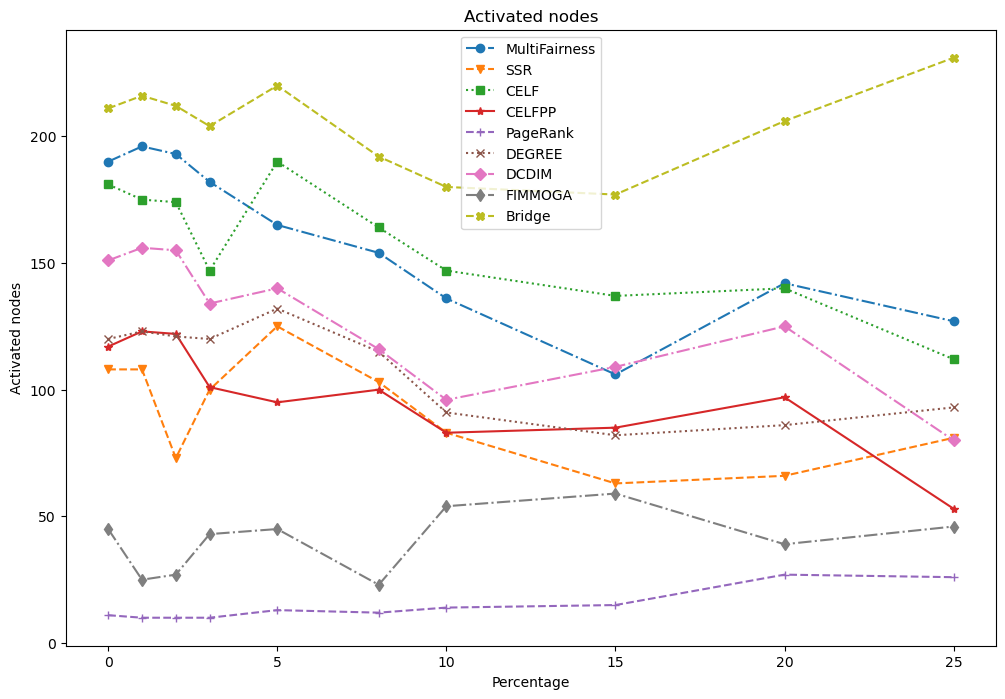

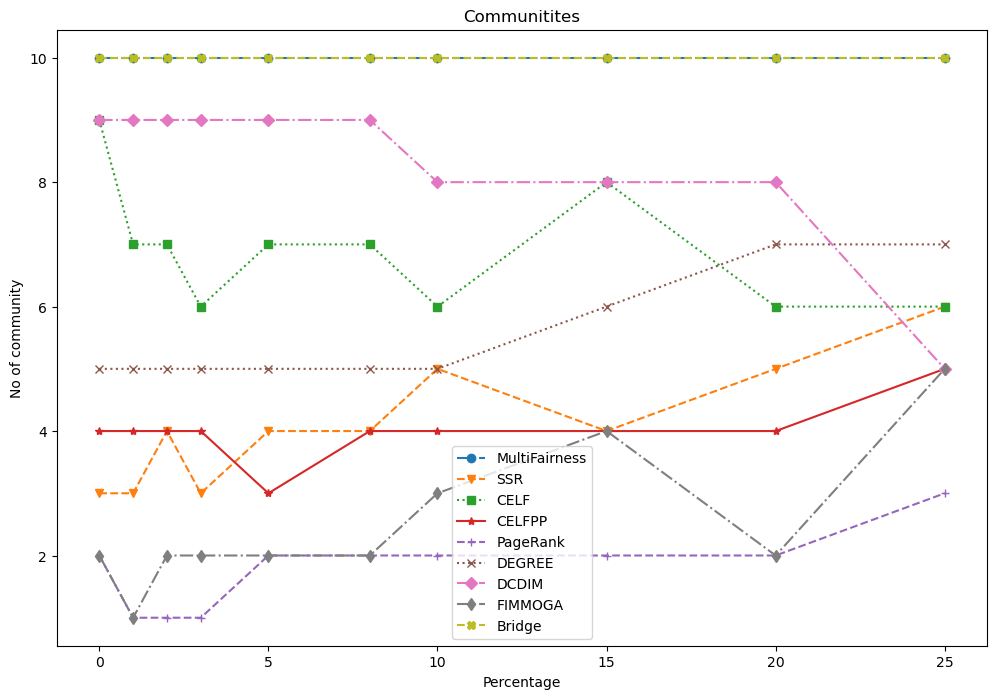

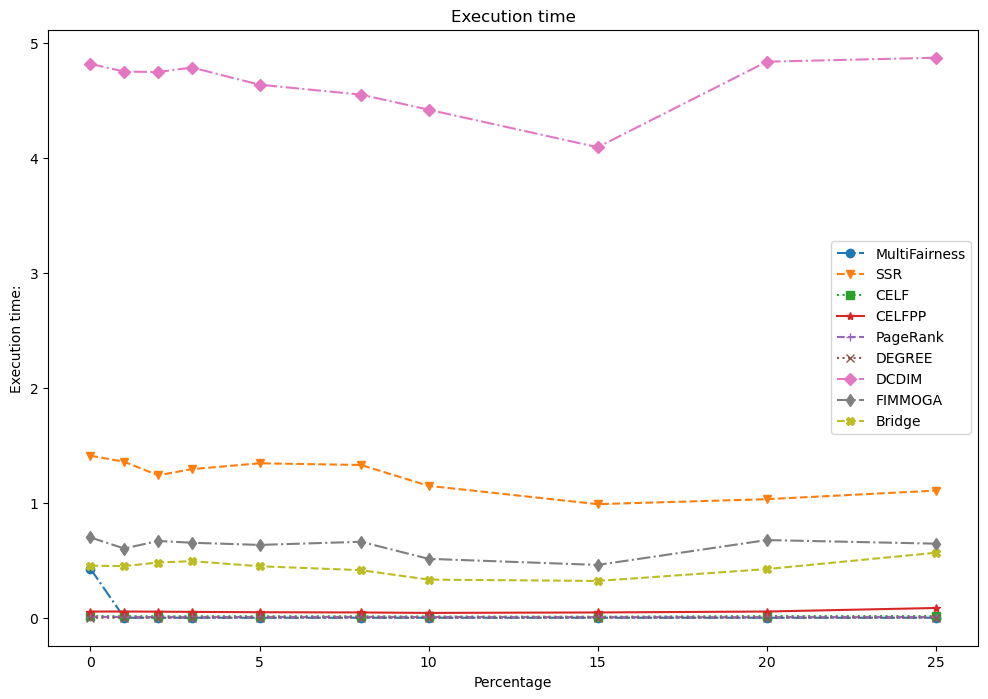

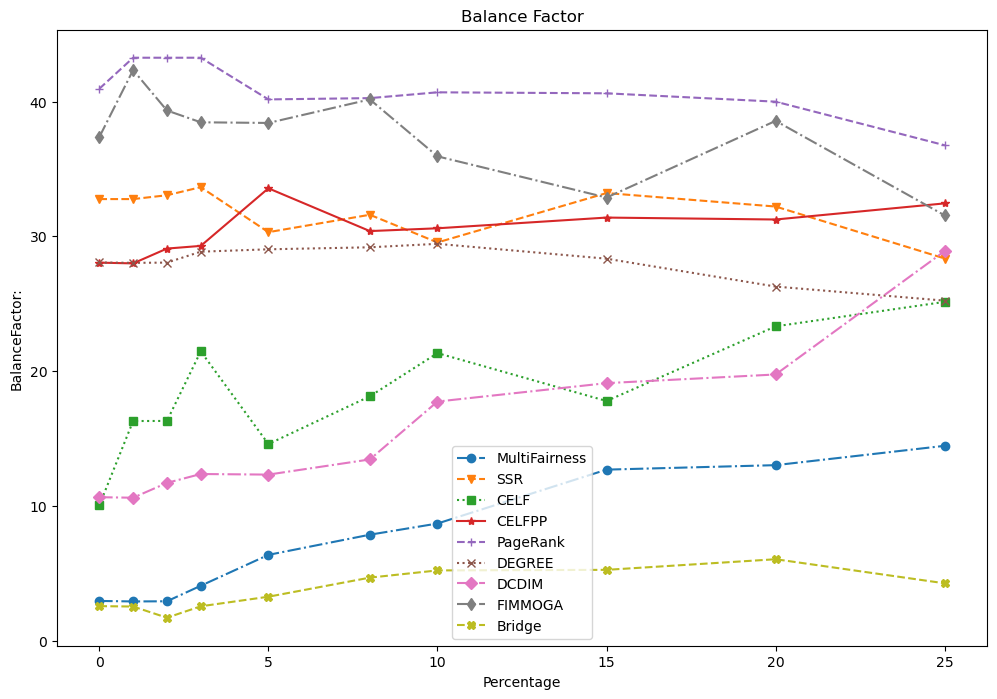

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\1271357737.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0,"Name of Algorithm",Name)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


count: 5271 <class '_io.TextIOWrapper'>
itr: [5271]
_______________________________________________________________________________________________
Get result at node: 5271
k: 1
[]
0
_________________________________________________________________________________________
Result at TemporalChangeRation:  0
_________________________________________________________________________________________
DiGraph with 998 nodes and 5271 edges
No change in graph
DiGraph with 998 nodes and 5271 edges


--------------- MultiFairness -------------------
MultiFairnes seed: [5, 16, 38, 116, 54, 36, 166, 185, 10, 69]
Current inf: 194 194
Basic Seed set and current seed set: [5, 16, 38, 116, 54, 36, 166, 185, 10, 69] [5, 16, 38, 116, 54, 36, 166, 185, 10, 69]
Basic inf set and current  inf: 194 194
Change in Percentage of Seed Set: 0.0
Chagne in percentage of influence seed set: 0.0
PreviousSeed set: {}
Communities formed:  10
Current inf: 194 0
{'Name': 'MultiFairness', 'k_nodes': 10, 'seedSet': [5, 16,

DCDIM: [[413, 38, 120, 507, 5, 2, 426, 73, 36, 111]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [10, 120, 38, 187, 5, 2, 426, 73, 36, 111], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 140, 'number of communities': 9, 'LTM': 21, 'ELTM': 48, 'ELTMP': 13, 'time': 4.326891183853149, 'balanceFactor': 13.751507607668744}
Communities formed:  10
Current inf: 140 140
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [413, 38, 120, 507, 5, 2, 426, 73, 36, 111], 'ChangeSeedSet': 20.0, 'ChangeInf': 0.0, 'IS0Gt': 144, 'length of activated nodes': 140, 'number of communities': 9, 'LTM': 23, 'ELTM': 46, 'ELTMP': 15, 'time': 4.467683792114258, 'balanceFactor': 13.06732909709156}


--------------- FIMMOGA -------------------
FIMMOGA seed: [71, 534, 149, 653, 407, 222, 226, 684, 816, 455]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [949, 64, 49, 358, 433, 327, 637, 909, 477, 598], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 

FIMMOGA seed: [27, 264, 134, 390, 597, 95, 374, 434, 477, 269]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [949, 64, 49, 358, 433, 327, 637, 909, 477, 598], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 23, 'number of communities': 2, 'LTM': 10, 'ELTM': 11, 'ELTMP': 10, 'time': 0.6374471187591553, 'balanceFactor': 39.403764749670906}
Communities formed:  10
Current inf: 52 23
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [27, 264, 134, 390, 597, 95, 374, 434, 477, 269], 'ChangeSeedSet': 90.0, 'ChangeInf': 126.08695652173914, 'IS0Gt': 23, 'length of activated nodes': 52, 'number of communities': 3, 'LTM': 10, 'ELTM': 13, 'ELTMP': 10, 'time': 0.6675994396209717, 'balanceFactor': 32.93046211567018}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 69, 2, 10, 5, 46, 73, 77, 206, 143, 80, 342, 35, 38, 166, 426, 116], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'l

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 69, 2, 10, 5, 46, 73, 77, 206, 143, 80, 342, 35, 38, 166, 426, 116], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 235, 'number of communities': 10, 'LTM': 23, 'ELTM': 52, 'ELTMP': 21, 'time': 0.7340357303619385, 'balanceFactor': 6.350218202030681}
Communities formed:  10
Current inf: 265 235
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 413, 69, 2, 5, 185, 73, 206, 80, 143, 342, 35, 38, 166, 426, 46, 116], 'ChangeSeedSet': 11.76470588235294, 'ChangeInf': 12.76595744680851, 'IS0Gt': 258, 'length of activated nodes': 265, 'number of communities': 10, 'LTM': 23, 'ELTM': 63, 'ELTMP': 22, 'time': 0.8933737277984619, 'balanceFactor': 5.9077027379811025}
_________________________________________________________________________________________
Result at TemporalChangeRation:  5
_________________________________________________________________________________________
DiGraph with 998 no

SSR seed: [930, 899, 614, 909, 974, 16, 21, 431, 46, 889]
PreviousSeed set: {'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 614, 234, 909, 974, 16, 21, 93, 414, 899], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 75, 'number of communities': 3, 'LTM': 16, 'ELTM': 48, 'ELTMP': 18, 'time': 1.5004639625549316, 'balanceFactor': 34.569752991253964}
Communities formed:  10
Current inf: 76 75
{'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 899, 614, 909, 974, 16, 21, 431, 46, 889], 'ChangeSeedSet': 30.0, 'ChangeInf': 1.3333333333333335, 'IS0Gt': 73, 'length of activated nodes': 76, 'number of communities': 4, 'LTM': 11, 'ELTM': 84, 'ELTMP': 10, 'time': 1.284752368927002, 'balanceFactor': 31.045176588431303}


--------------- CELF -------------------
CELF seed set: [36, 116, 413, 10, 62, 254, 160, 185, 111, 210]
PreviousSeed set: {'Name': 'CELF', 'k_nodes': 10, 'seedSet': [10, 36, 46, 35, 62, 73, 5, 106, 116, 231], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 

DCDIM: [[832, 118, 53, 526, 120, 507, 163, 32, 36, 39]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [10, 120, 38, 187, 5, 2, 426, 73, 36, 111], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 140, 'number of communities': 9, 'LTM': 21, 'ELTM': 48, 'ELTMP': 13, 'time': 4.326891183853149, 'balanceFactor': 13.751507607668744}
Communities formed:  10
Current inf: 111 140
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [832, 118, 53, 526, 120, 507, 163, 32, 36, 39], 'ChangeSeedSet': 80.0, 'ChangeInf': -20.714285714285715, 'IS0Gt': 159, 'length of activated nodes': 111, 'number of communities': 7, 'LTM': 33, 'ELTM': 124, 'ELTMP': 18, 'time': 4.523400068283081, 'balanceFactor': 20.804340270272466}


--------------- FIMMOGA -------------------
FIMMOGA seed: [159, 255, 313, 484, 299, 220, 918, 826, 407, 595]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [949, 64, 49, 358, 433, 327, 637, 909, 477, 598], 'ChangeSeedSet': 100.0, 'C

FIMMOGA seed: [997, 161, 995, 994, 866, 992, 342, 877, 153, 96]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [949, 64, 49, 358, 433, 327, 637, 909, 477, 598], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 23, 'number of communities': 2, 'LTM': 10, 'ELTM': 11, 'ELTMP': 10, 'time': 0.6374471187591553, 'balanceFactor': 39.403764749670906}
Communities formed:  10
Current inf: 31 23
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [997, 161, 995, 994, 866, 992, 342, 877, 153, 96], 'ChangeSeedSet': 100.0, 'ChangeInf': 34.78260869565217, 'IS0Gt': 34, 'length of activated nodes': 31, 'number of communities': 3, 'LTM': 11, 'ELTM': 14, 'ELTMP': 10, 'time': 0.7764692306518555, 'balanceFactor': 35.422748872755804}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 69, 2, 10, 5, 46, 73, 77, 206, 143, 80, 342, 35, 38, 166, 426, 116], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0,

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 69, 2, 10, 5, 46, 73, 77, 206, 143, 80, 342, 35, 38, 166, 426, 116], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 235, 'number of communities': 10, 'LTM': 23, 'ELTM': 52, 'ELTMP': 21, 'time': 0.7340357303619385, 'balanceFactor': 6.350218202030681}
Communities formed:  10
Current inf: 242 235
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [36, 2, 123, 413, 141, 274, 5, 73, 206, 143, 342, 35, 38, 166, 426, 46, 116], 'ChangeSeedSet': 23.52941176470588, 'ChangeInf': 2.9787234042553195, 'IS0Gt': 222, 'length of activated nodes': 242, 'number of communities': 10, 'LTM': 28, 'ELTM': 192, 'ELTMP': 29, 'time': 0.864116907119751, 'balanceFactor': 4.6723544393008805}
_________________________________________________________________________________________
Result at TemporalChangeRation:  25
_________________________________________________________________________________________
DiGraph with 99

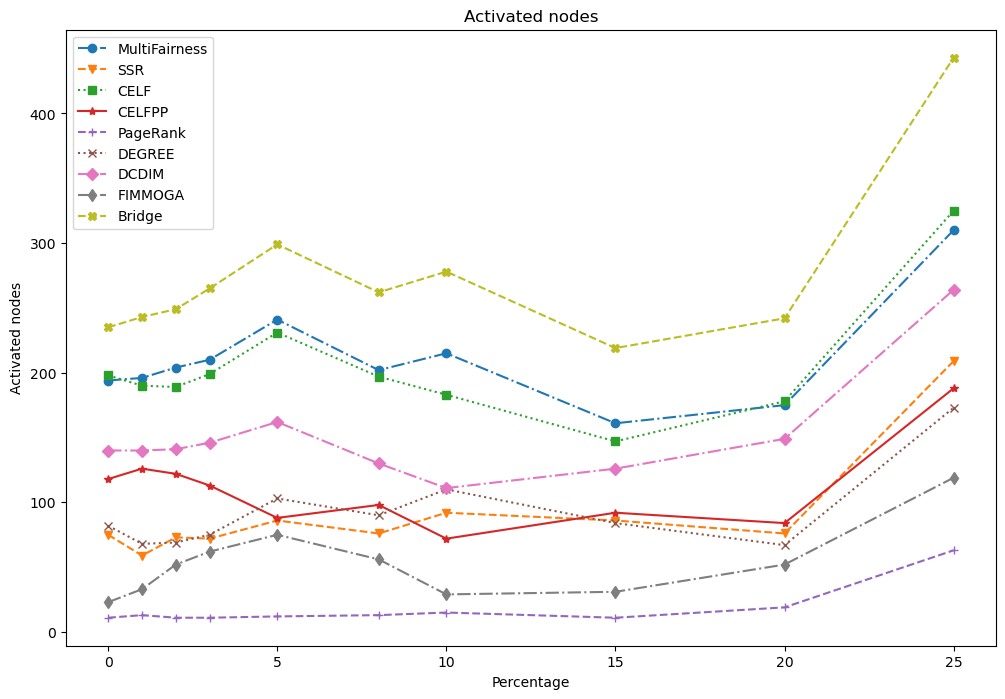

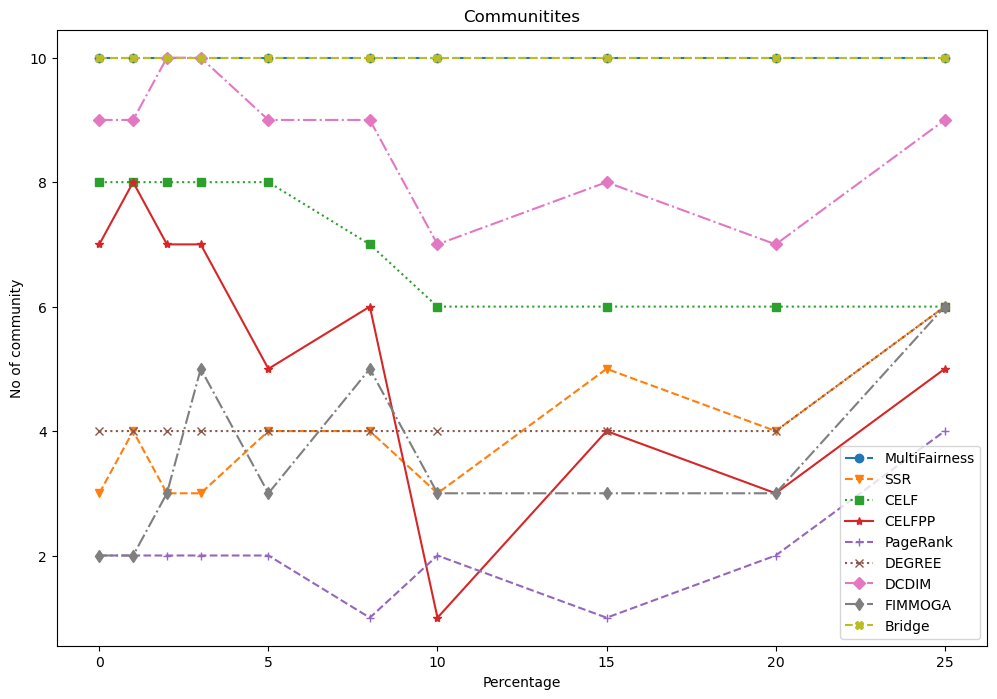

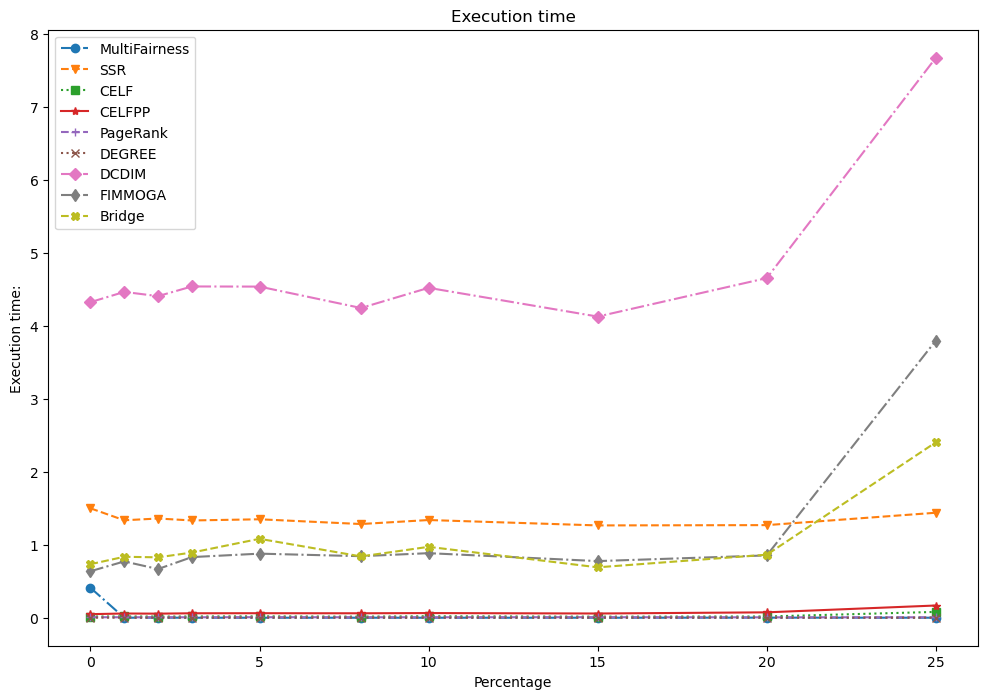

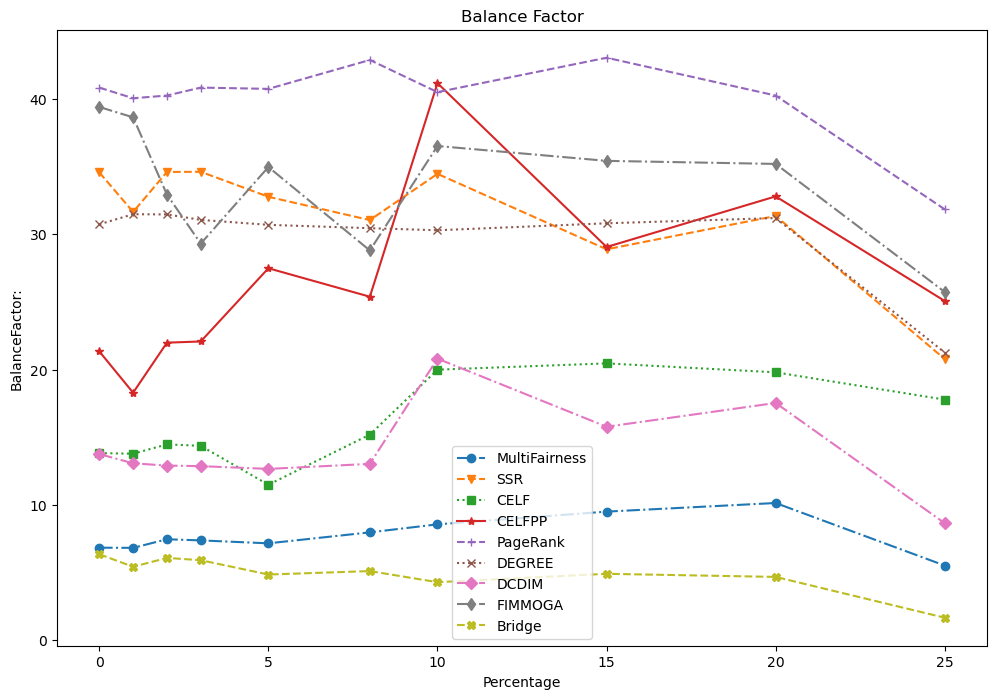

C:\Users\HP\AppData\Local\Temp\ipykernel_5132\1271357737.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0,"Name of Algorithm",Name)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


count: 5271 <class '_io.TextIOWrapper'>
itr: [5271]
_______________________________________________________________________________________________
Get result at node: 5271
k: 1
[]
0
_________________________________________________________________________________________
Result at TemporalChangeRation:  0
_________________________________________________________________________________________
DiGraph with 998 nodes and 5271 edges
No change in graph
DiGraph with 998 nodes and 5271 edges


--------------- MultiFairness -------------------
MultiFairnes seed: [31, 144, 143, 3, 15, 39, 16, 76, 166, 217]
Current inf: 209 209
Basic Seed set and current seed set: [31, 144, 143, 3, 15, 39, 16, 76, 166, 217] [31, 144, 143, 3, 15, 39, 16, 76, 166, 217]
Basic inf set and current  inf: 209 209
Change in Percentage of Seed Set: 0.0
Chagne in percentage of influence seed set: 0.0
PreviousSeed set: {}
Communities formed:  10
Current inf: 209 0
{'Name': 'MultiFairness', 'k_nodes': 10, 'seedSet': [31,

DCDIM: [[16, 3, 17, 76, 414, 328, 62, 273, 409, 386]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [16, 3, 17, 76, 414, 328, 62, 273, 409, 386], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 161, 'number of communities': 10, 'LTM': 20, 'ELTM': 64, 'ELTMP': 16, 'time': 4.164505958557129, 'balanceFactor': 8.574548077182383}
Communities formed:  10
Current inf: 160 161
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [16, 3, 17, 76, 414, 328, 62, 273, 409, 386], 'ChangeSeedSet': 0.0, 'ChangeInf': -0.6211180124223602, 'IS0Gt': 160, 'length of activated nodes': 160, 'number of communities': 10, 'LTM': 20, 'ELTM': 54, 'ELTMP': 16, 'time': 4.242794752120972, 'balanceFactor': 8.582095282817766}


--------------- FIMMOGA -------------------
FIMMOGA seed: [325, 239, 966, 656, 103, 118, 882, 495, 706, 96]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [347, 519, 274, 395, 317, 783, 205, 416, 165, 563], 'ChangeSeedSet': 100.0, 'Chan

FIMMOGA seed: [673, 298, 166, 380, 87, 803, 482, 507, 43, 860]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [347, 519, 274, 395, 317, 783, 205, 416, 165, 563], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 37, 'number of communities': 1, 'LTM': 10, 'ELTM': 11, 'ELTMP': 10, 'time': 0.5953996181488037, 'balanceFactor': 38.660573738492694}
Communities formed:  10
Current inf: 48 37
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [673, 298, 166, 380, 87, 803, 482, 507, 43, 860], 'ChangeSeedSet': 100.0, 'ChangeInf': 29.72972972972973, 'IS0Gt': 37, 'length of activated nodes': 48, 'number of communities': 2, 'LTM': 11, 'ELTM': 17, 'ELTMP': 11, 'time': 0.6034586429595947, 'balanceFactor': 35.063631779704444}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [3, 166, 16, 217, 76, 39, 321, 386, 77, 15, 20, 21, 226, 38, 431, 56, 62], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [3, 166, 16, 217, 76, 39, 321, 386, 77, 15, 20, 21, 226, 38, 431, 56, 62], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 209, 'number of communities': 10, 'LTM': 24, 'ELTM': 80, 'ELTMP': 22, 'time': 0.5038306713104248, 'balanceFactor': 3.9331692285110025}
Communities formed:  10
Current inf: 228 209
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [3, 166, 16, 217, 76, 192, 386, 321, 15, 77, 21, 226, 39, 38, 431, 56, 62], 'ChangeSeedSet': 5.88235294117647, 'ChangeInf': 9.090909090909092, 'IS0Gt': 216, 'length of activated nodes': 228, 'number of communities': 10, 'LTM': 23, 'ELTM': 96, 'ELTMP': 24, 'time': 0.5577421188354492, 'balanceFactor': 3.9464840713284395}
_________________________________________________________________________________________
Result at TemporalChangeRation:  5
_________________________________________________________________________________________
DiGraph with 998 n

SSR seed: [930, 93, 614, 909, 974, 16, 21, 46, 899, 819]
PreviousSeed set: {'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 614, 909, 974, 16, 21, 93, 414, 234, 484], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 87, 'number of communities': 5, 'LTM': 18, 'ELTM': 53, 'ELTMP': 17, 'time': 1.4199941158294678, 'balanceFactor': 26.232439207519054}
Communities formed:  10
Current inf: 91 87
{'Name': 'SSR', 'k_nodes': 10, 'seedSet': [930, 93, 614, 909, 974, 16, 21, 46, 899, 819], 'ChangeSeedSet': 30.0, 'ChangeInf': 4.597701149425287, 'IS0Gt': 100, 'length of activated nodes': 91, 'number of communities': 4, 'LTM': 17, 'ELTM': 58, 'ELTMP': 14, 'time': 1.2752842903137207, 'balanceFactor': 29.32348166087737}


--------------- CELF -------------------
CELF seed set: [217, 240, 3, 226, 39, 76, 12, 466, 166, 143]
PreviousSeed set: {'Name': 'CELF', 'k_nodes': 10, 'seedSet': [39, 76, 3, 217, 31, 166, 12, 62, 16, 253], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0



--------------- PAGERANK -------------------
PageRank seed set: [931, 781, 989, 885, 961, 974, 930, 580, 542, 985]
PreviousSeed set: {'Name': 'PageRank', 'k_nodes': 10, 'seedSet': [931, 926, 917, 985, 989, 961, 974, 933, 709, 962], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 10, 'number of communities': 2, 'LTM': 10, 'ELTM': 10, 'ELTMP': 10, 'time': 0.005984306335449219, 'balanceFactor': 37.771681980806655}
Communities formed:  10
Current inf: 64 10
{'Name': 'PageRank', 'k_nodes': 10, 'seedSet': [931, 781, 989, 885, 961, 974, 930, 580, 542, 985], 'ChangeSeedSet': 50.0, 'ChangeInf': 540.0, 'IS0Gt': 34, 'length of activated nodes': 64, 'number of communities': 3, 'LTM': 12, 'ELTM': 30, 'ELTMP': 13, 'time': 0.006984233856201172, 'balanceFactor': 31.320685104320237}


--------------- DEGREE -------------------
Degree Seed set: [16, 899, 930, 21, 342, 432, 614, 852, 426, 974]
PreviousSeed set: {'Name': 'DEGREE', 'k_nodes': 10, 'seedSet': [899, 16, 93

DCDIM: [[578, 16, 726, 476, 39, 122, 328, 218, 411, 386]]
PreviousSeed set: {'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [16, 3, 17, 76, 414, 328, 62, 273, 409, 386], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 161, 'number of communities': 10, 'LTM': 20, 'ELTM': 64, 'ELTMP': 16, 'time': 4.164505958557129, 'balanceFactor': 8.574548077182383}
Communities formed:  10
Current inf: 143 161
{'Name': 'DCDIM', 'k_nodes': 10, 'seedSet': [578, 16, 726, 476, 39, 122, 328, 218, 411, 386], 'ChangeSeedSet': 70.0, 'ChangeInf': -11.180124223602485, 'IS0Gt': 135, 'length of activated nodes': 143, 'number of communities': 8, 'LTM': 31, 'ELTM': 93, 'ELTMP': 19, 'time': 4.263509511947632, 'balanceFactor': 17.68707513913612}


--------------- FIMMOGA -------------------
FIMMOGA seed: [478, 810, 655, 76, 350, 748, 520, 129, 251, 671]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [347, 519, 274, 395, 317, 783, 205, 416, 165, 563], 'ChangeSeedSet': 100.

FIMMOGA seed: [479, 910, 730, 368, 843, 670, 231, 802, 692, 200]
PreviousSeed set: {'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [347, 519, 274, 395, 317, 783, 205, 416, 165, 563], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 37, 'number of communities': 1, 'LTM': 10, 'ELTM': 11, 'ELTMP': 10, 'time': 0.5953996181488037, 'balanceFactor': 38.660573738492694}
Communities formed:  10
Current inf: 145 37
{'Name': 'FIMMOGA', 'k_nodes': 10, 'seedSet': [479, 910, 730, 368, 843, 670, 231, 802, 692, 200], 'ChangeSeedSet': 100.0, 'ChangeInf': 291.8918918918919, 'IS0Gt': 202, 'length of activated nodes': 145, 'number of communities': 4, 'LTM': 10, 'ELTM': 667, 'ELTMP': 10, 'time': 3.656878709793091, 'balanceFactor': 27.553383688430497}


--------------- Bridge -------------------
PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [3, 166, 16, 217, 76, 39, 321, 386, 77, 15, 20, 21, 226, 38, 431, 56, 62], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS

PreviousSeed set: {'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [3, 166, 16, 217, 76, 39, 321, 386, 77, 15, 20, 21, 226, 38, 431, 56, 62], 'ChangeSeedSet': 100.0, 'ChangeInf': 100, 'IS0Gt': 0, 'length of activated nodes': 209, 'number of communities': 10, 'LTM': 24, 'ELTM': 80, 'ELTMP': 22, 'time': 0.5038306713104248, 'balanceFactor': 3.9331692285110025}
Communities formed:  10
Current inf: 429 209
{'Name': 'Bridge', 'k_nodes': 10, 'seedSet': [174, 166, 3, 39, 386, 592, 321, 77, 15, 20, 21, 217, 40, 38, 46, 56, 62], 'ChangeSeedSet': 23.52941176470588, 'ChangeInf': 105.26315789473684, 'IS0Gt': 413, 'length of activated nodes': 429, 'number of communities': 10, 'LTM': 41, 'ELTM': 713, 'ELTMP': 45, 'time': 2.081430196762085, 'balanceFactor': 2.942124320906519}
Percentage change file written successfully...




^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


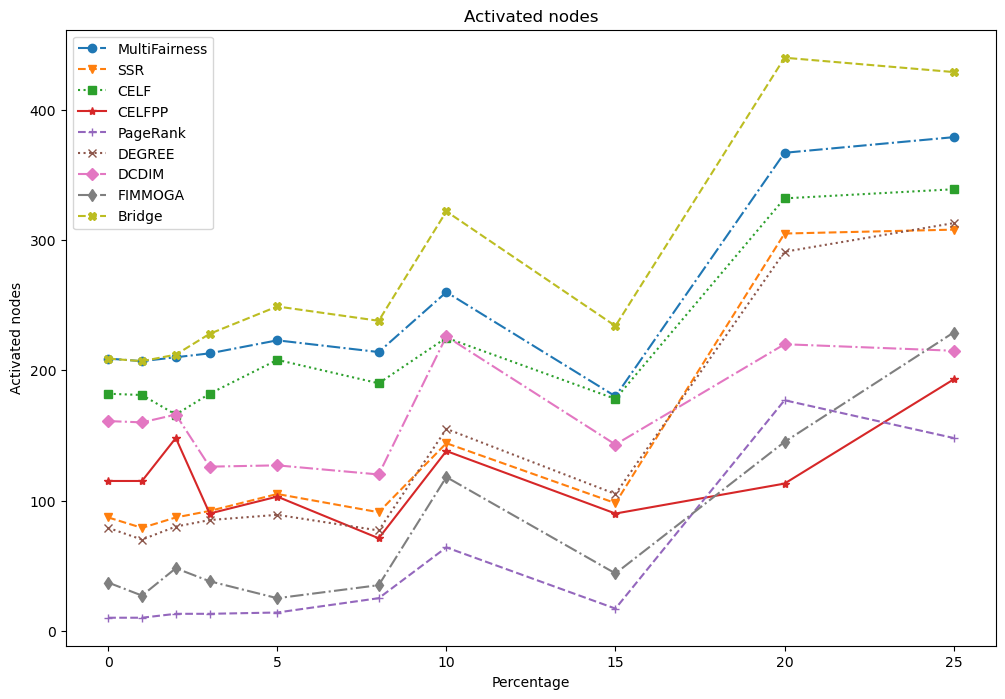

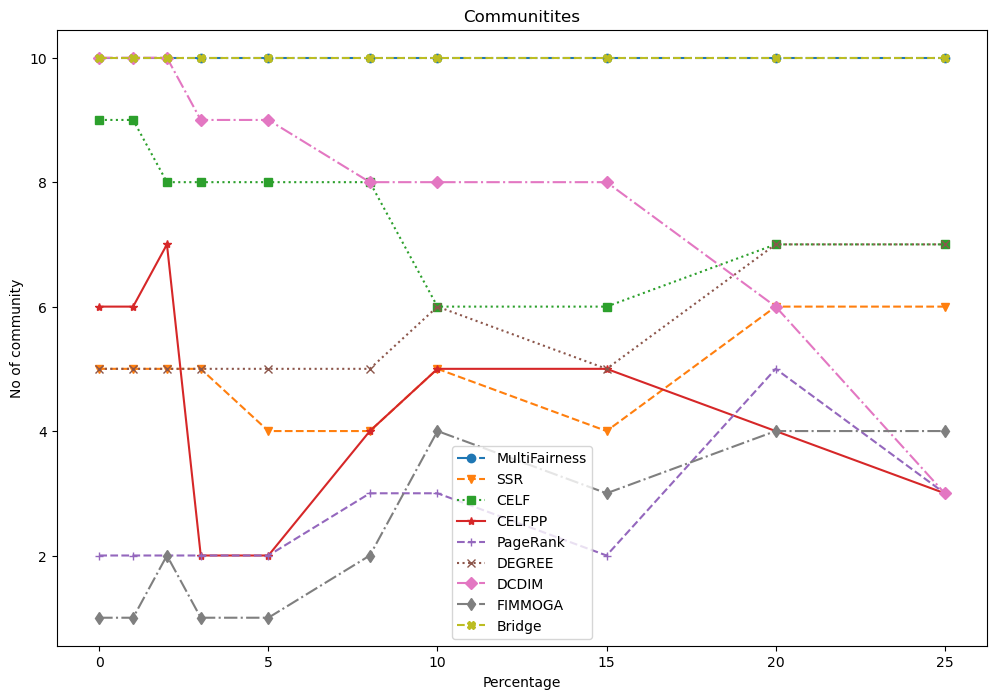

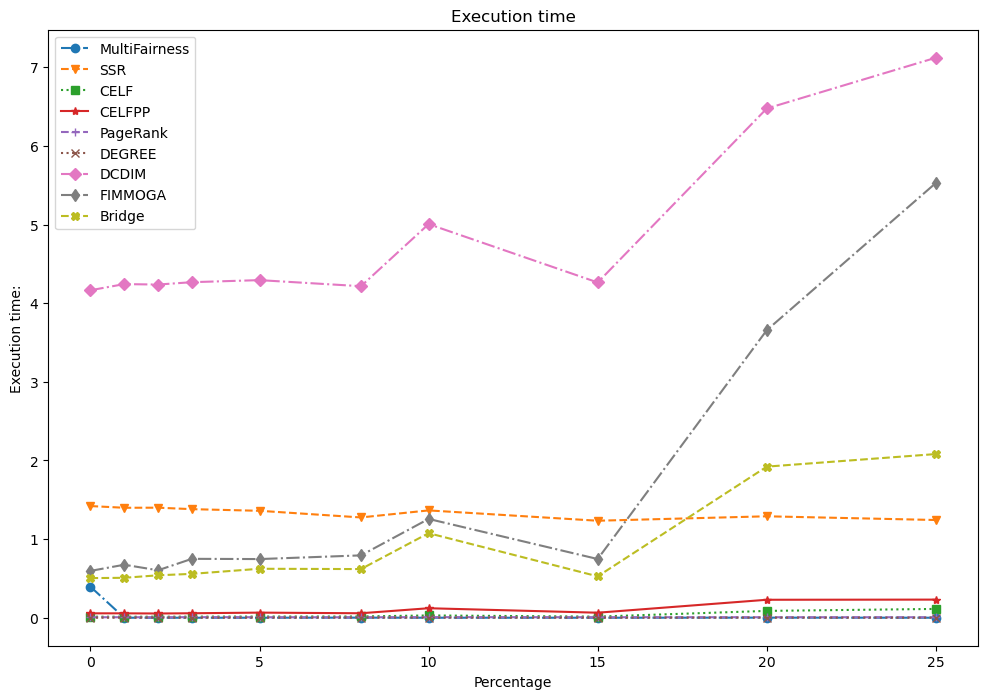

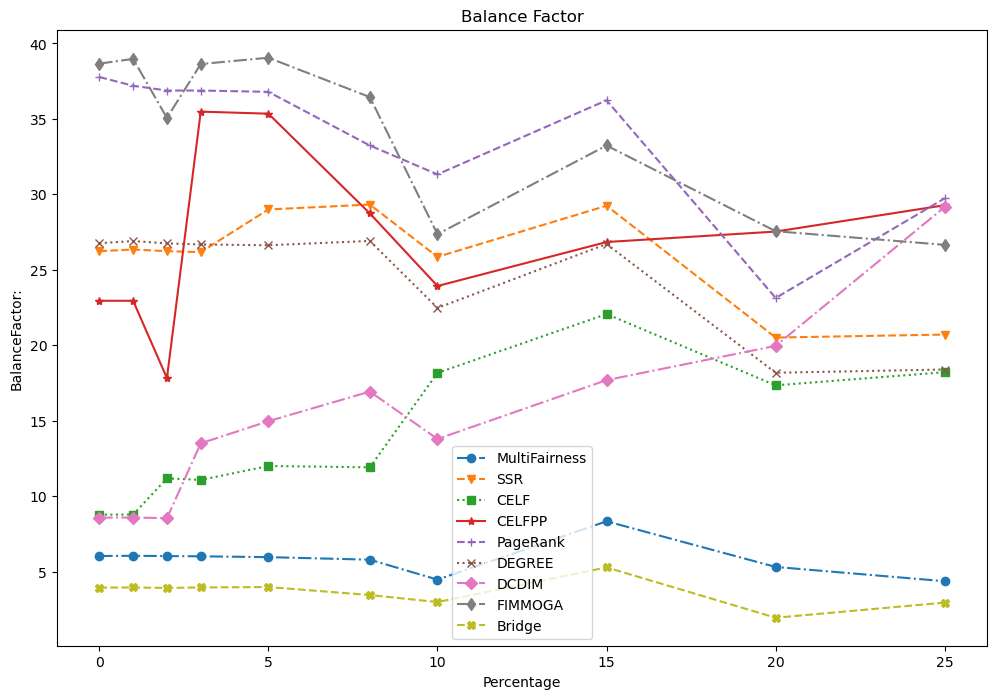

(27, 101)


C:\Users\HP\AppData\Local\Temp\ipykernel_5132\1271357737.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0,"Name of Algorithm",Name)


In [179]:
iteration=3
finalSizeOfSeedSet=10
Result_file_name="Demo.xlsx"
comm_file_path='LFR_1000_0.4_comm_list.txt'
result=executeDiv(iteration)
processResults(Result_file_name)